# Predict sales prices using Multilinear Regression
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
SalePrice is our target variable to predict.

In [1]:
#Predict sales prices
#importin library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv

In [3]:
dftrn = pd.read_csv('Htrain.csv')
dftrn.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dftst = pd.read_csv('Htest.csv')
dftst.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#shape of train data
dftrn.shape


(1460, 81)

In [6]:
#you can also check the data set information using the info() command. 
dftrn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
#Let's check if the data set has any missing values including categorical values and numerical..
dftrn.columns[dftrn.isnull().any()]


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [8]:
dftrn.apply(lambda x: sum(x.isnull()))

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [9]:
#missing value counts in each of these columns in percentage including cat and numerical values
Isnull = dftrn.isnull().sum()/len(dftrn)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [10]:
"""Separate variable into new dataframe from original dataframe which
has only numerical values
there is 38 numerical attribute from 81 attributes"""
dftrn_corr = dftrn.select_dtypes(include=[np.number])


In [11]:
dftrn_corr.shape


(1460, 38)

In [12]:
#Delete Id because that is not need for correlation plot
del dftrn_corr['Id']


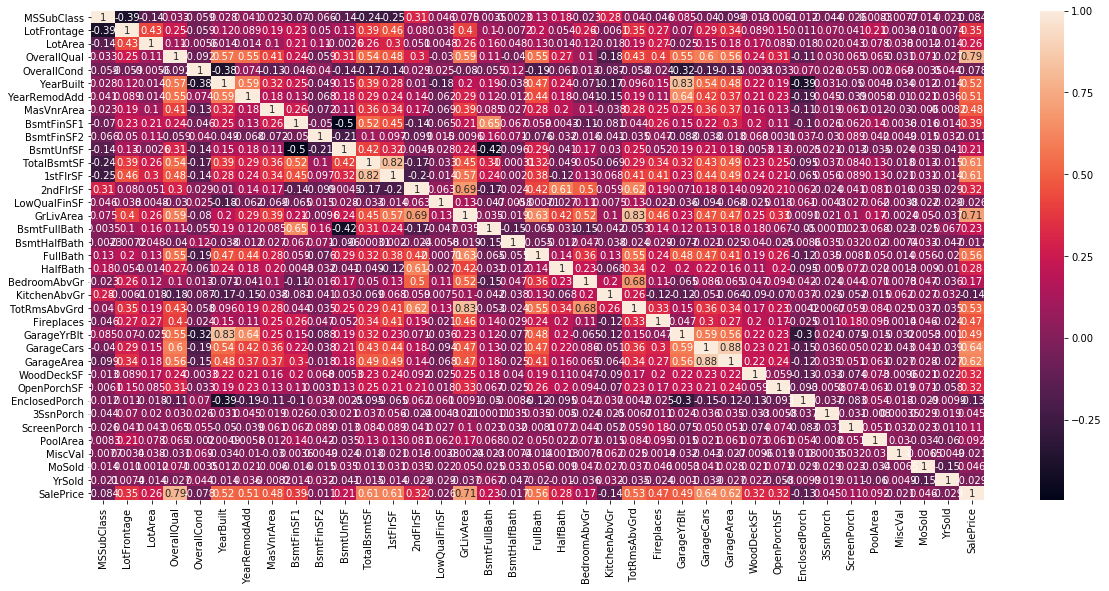

In [13]:
#Correlation plot
import seaborn as sns
corr = dftrn_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

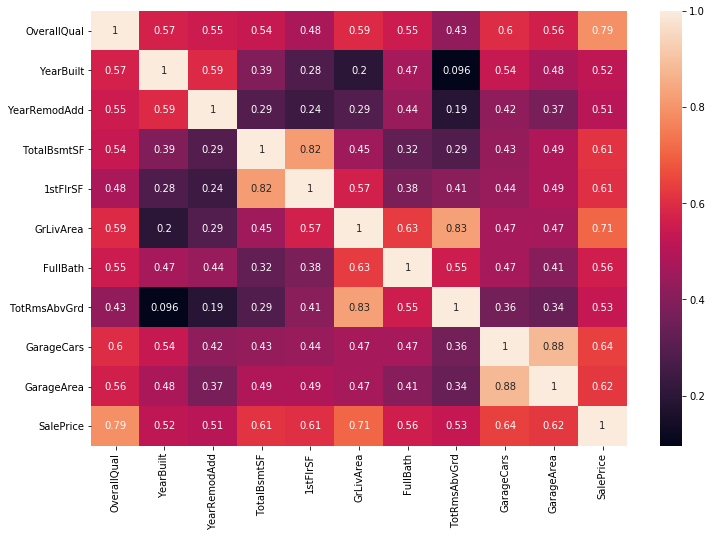

In [14]:
#Top 50% Corralation train attributes with sale-price¶
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = dftrn[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()
#Here OverallQual is highly correlated with target feature of saleprice by 79%

In [15]:
#unique value of OverallQual
dftrn.OverallQual.unique()


array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


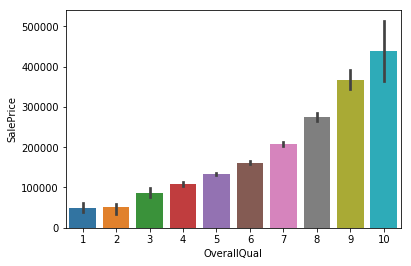

In [16]:
sns.barplot(dftrn.OverallQual, dftrn.SalePrice)


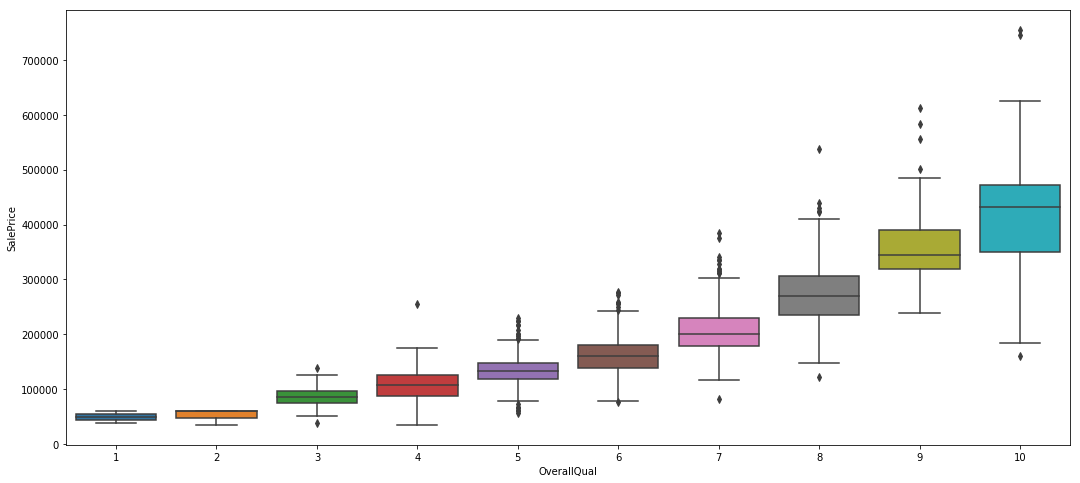

In [17]:
#boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=dftrn.OverallQual, y=dftrn.SalePrice)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


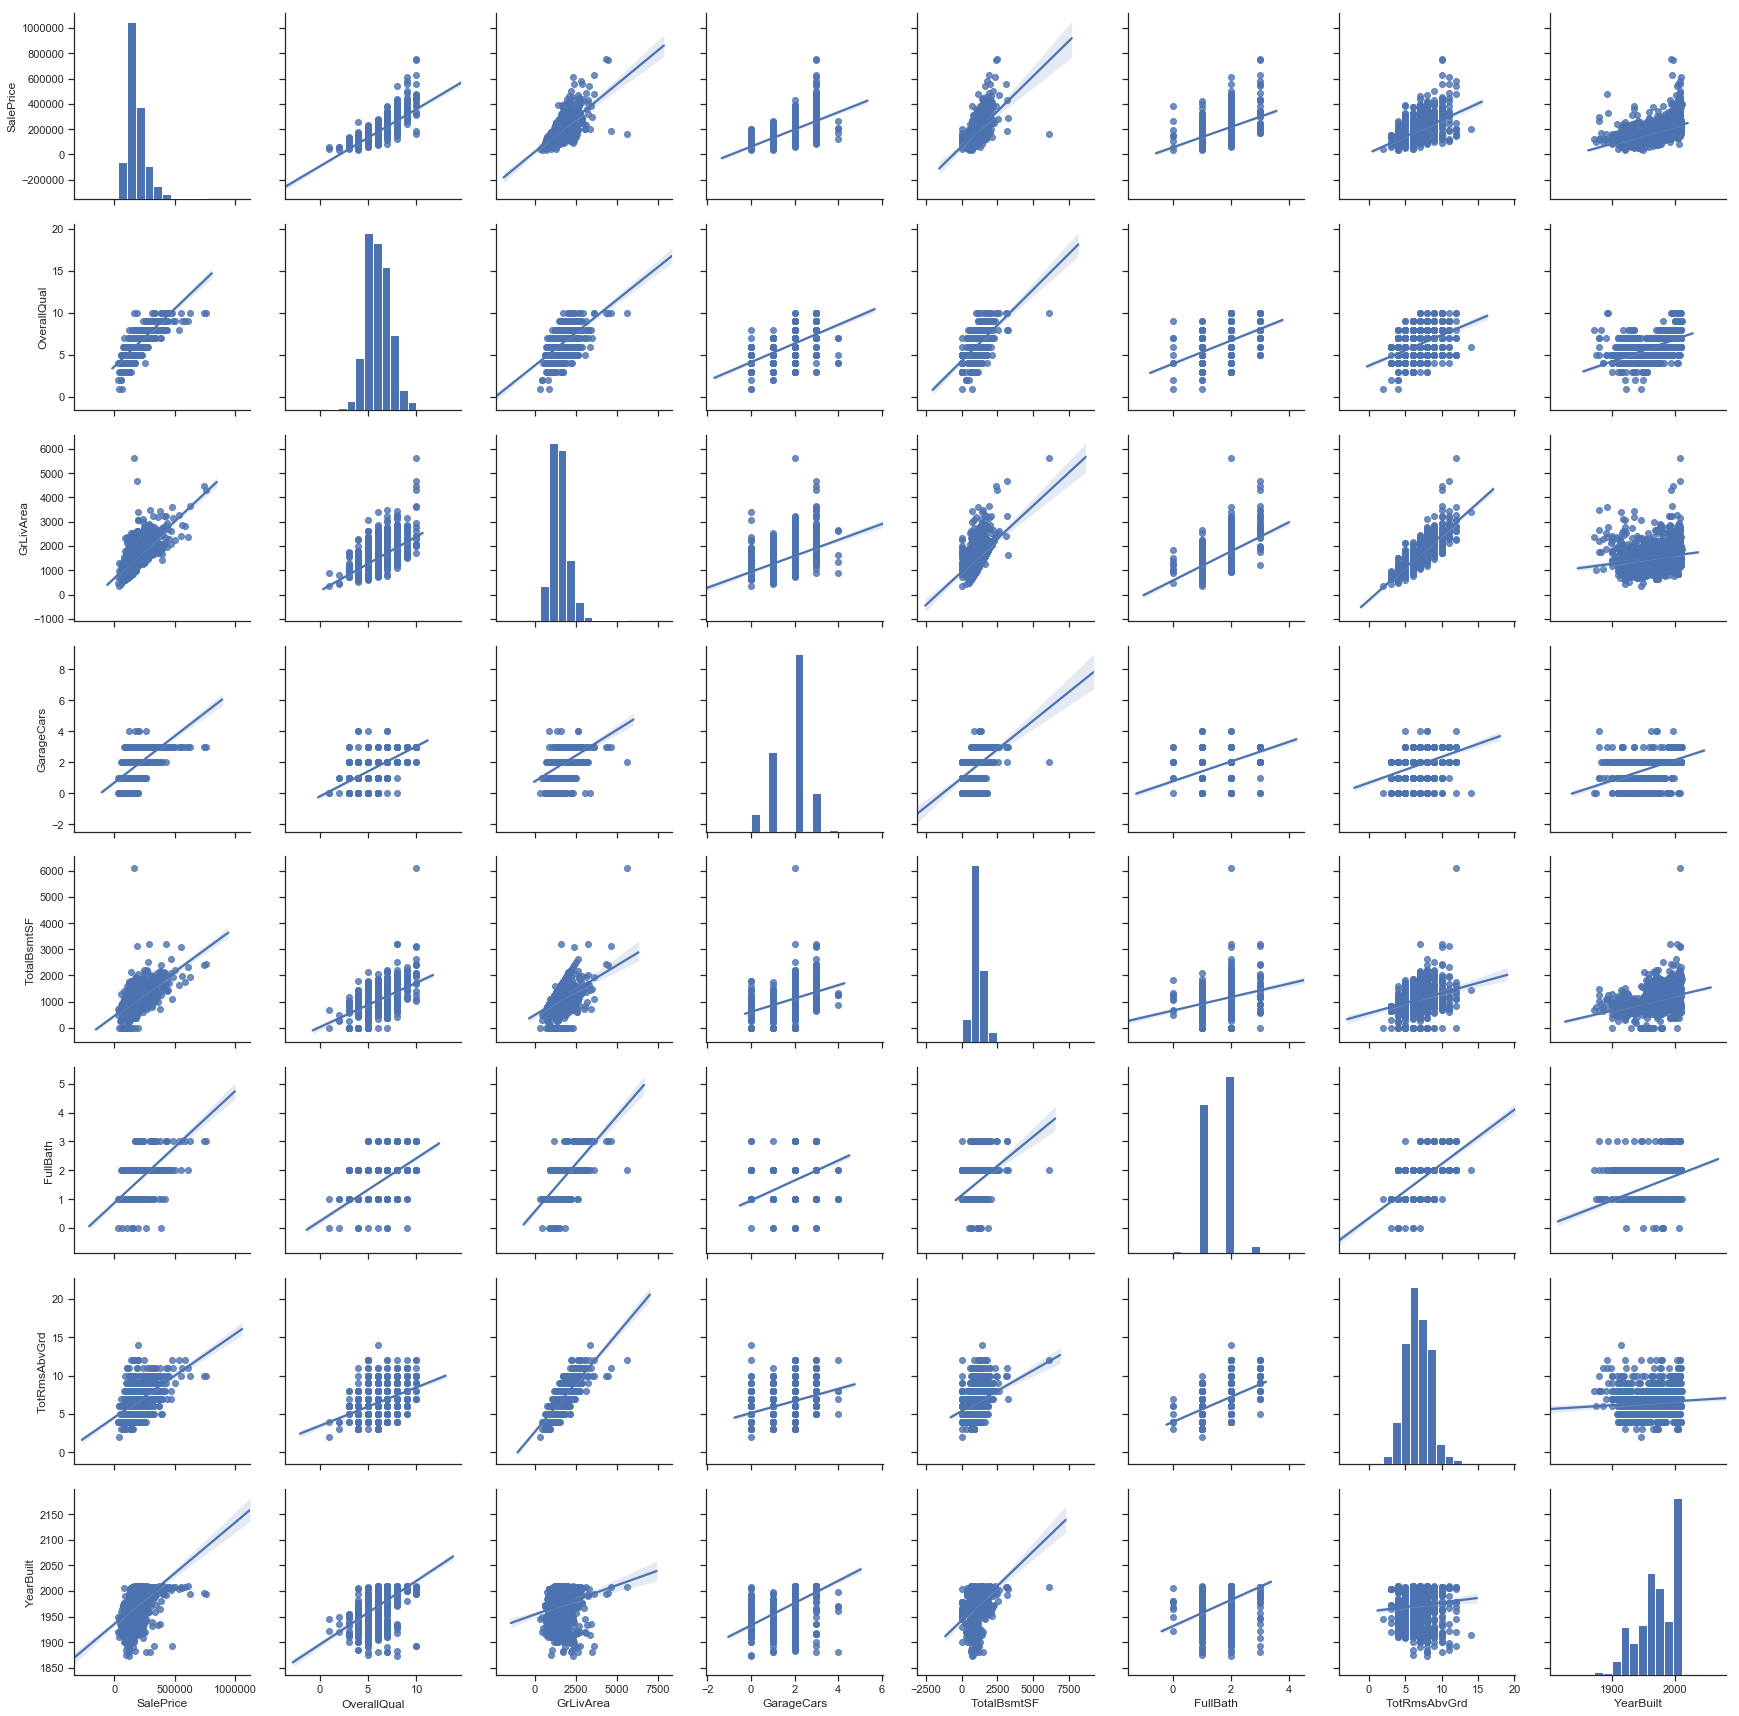

In [18]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(dftrn[col], size=3, kind='reg')

In [19]:
print("Find most important features relative to target")
corr = dftrn.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [20]:
#Imputting missing values¶
# PoolQC has missing value ratio is 99%+. So, there is fill by None
dftrn['PoolQC'] = dftrn['PoolQC'].fillna('None')


In [21]:
#Arround 50% missing values attributes have been fill by None
dftrn['MiscFeature'] = dftrn['MiscFeature'].fillna('None')
dftrn['Alley'] = dftrn['Alley'].fillna('None')
dftrn['Fence'] = dftrn['Fence'].fillna('None')
dftrn['FireplaceQu'] = dftrn['FireplaceQu'].fillna('None')

In [22]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
dftrn['LotFrontage'] = dftrn.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
dftrn['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7        80.0
8        51.0
9        50.0
10       70.0
11       85.0
12       71.0
13       91.0
14       73.0
15       51.0
16       73.0
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24       71.0
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
1430     60.0
1431     24.0
1432     60.0
1433     93.0
1434     80.0
1435     80.0
1436     60.0
1437     96.0
1438     90.0
1439     80.0
1440     79.0
1441     70.0
1442     85.0
1443     52.0
1444     63.0
1445     70.0
1446     73.0
1447     80.0
1448     70.0
1449     21.0
1450     60.0
1451     78.0
1452     35.0
1453     90.0
1454     62.0
1455     62.0
1456     85.0
1457     66.0
1458     68.0
1459     75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [23]:
#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    dftrn[col] = dftrn[col].fillna('None')

In [24]:
dftrn.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [25]:
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    dftrn[col] = dftrn[col].fillna(int(0))

In [26]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    dftrn[col] = dftrn[col].fillna('None')

In [27]:
#MasVnrArea : replace with zero
dftrn['MasVnrArea'] = dftrn['MasVnrArea'].fillna(int(0))

In [28]:
#MasVnrType : replace with None
dftrn['MasVnrType'] = dftrn['MasVnrType'].fillna('None')

In [29]:
 #There is put mode value 
dftrn['Electrical'] = dftrn['Electrical'].fillna(dftrn['Electrical']).mode()[0]

In [30]:
#There is no need of Utilities
dftrn = dftrn.drop(['Utilities'], axis=1)

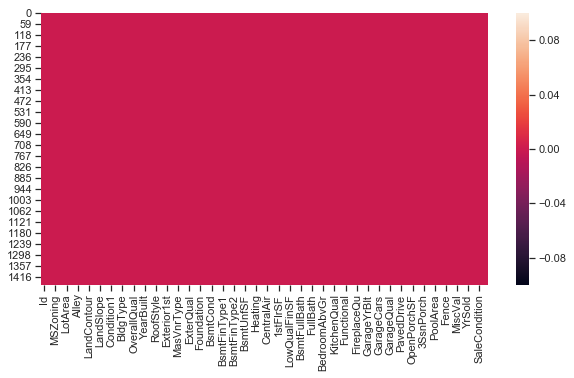

In [31]:
#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(dftrn.isnull())

In [32]:
#Encoding categorical value into int
cagi = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [33]:
from sklearn.preprocessing import LabelEncoder
for c in cagi:
    lbl = LabelEncoder() 
    lbl.fit(list(dftrn[c].values)) 
    dftrn[c] = lbl.transform(list(dftrn[c].values))


In [34]:
dftrn.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,5,3,65.0,8450,1,1,3,3,4,...,0,3,4,1,0,1,2,8,4,208500
1,2,0,3,80.0,9600,1,1,3,3,2,...,0,3,4,1,0,4,1,8,4,181500
2,3,5,3,68.0,11250,1,1,0,3,4,...,0,3,4,1,0,8,2,8,4,223500
3,4,6,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,1,0,8,0,140000
4,5,5,3,84.0,14260,1,1,0,3,2,...,0,3,4,1,0,11,2,8,4,250000


In [35]:
##Importing the independent data set for Prepraring data
X = dftrn.iloc[:,:-1].values
X

array([[1.000e+00, 5.000e+00, 3.000e+00, ..., 2.000e+00, 8.000e+00,
        4.000e+00],
       [2.000e+00, 0.000e+00, 3.000e+00, ..., 1.000e+00, 8.000e+00,
        4.000e+00],
       [3.000e+00, 5.000e+00, 3.000e+00, ..., 2.000e+00, 8.000e+00,
        4.000e+00],
       ...,
       [1.458e+03, 6.000e+00, 3.000e+00, ..., 4.000e+00, 8.000e+00,
        4.000e+00],
       [1.459e+03, 0.000e+00, 3.000e+00, ..., 4.000e+00, 8.000e+00,
        4.000e+00],
       [1.460e+03, 0.000e+00, 3.000e+00, ..., 2.000e+00, 8.000e+00,
        4.000e+00]])

In [36]:
Y = dftrn.iloc[:,79].values
Y

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [37]:
#spliting the dataset into Training Set and Testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 1/3,random_state = 10)

In [38]:
X_train

array([[6.69e+02, 0.00e+00, 3.00e+00, ..., 0.00e+00, 8.00e+00, 4.00e+00],
       [1.81e+02, 1.20e+01, 1.00e+00, ..., 1.00e+00, 8.00e+00, 4.00e+00],
       [8.87e+02, 1.00e+01, 3.00e+00, ..., 0.00e+00, 8.00e+00, 3.00e+00],
       ...,
       [5.28e+02, 5.00e+00, 3.00e+00, ..., 2.00e+00, 6.00e+00, 5.00e+00],
       [1.15e+03, 6.00e+00, 4.00e+00, ..., 3.00e+00, 8.00e+00, 4.00e+00],
       [1.29e+03, 5.00e+00, 3.00e+00, ..., 0.00e+00, 6.00e+00, 5.00e+00]])

In [39]:
X_test

array([[8.550e+02, 0.000e+00, 3.000e+00, ..., 0.000e+00, 8.000e+00,
        0.000e+00],
       [3.820e+02, 0.000e+00, 1.000e+00, ..., 0.000e+00, 6.000e+00,
        5.000e+00],
       [8.170e+02, 0.000e+00, 3.000e+00, ..., 0.000e+00, 8.000e+00,
        4.000e+00],
       ...,
       [3.100e+01, 6.000e+00, 0.000e+00, ..., 2.000e+00, 8.000e+00,
        4.000e+00],
       [2.050e+02, 4.000e+00, 4.000e+00, ..., 3.000e+00, 8.000e+00,
        4.000e+00],
       [1.444e+03, 1.000e+00, 3.000e+00, ..., 3.000e+00, 8.000e+00,
        4.000e+00]])

In [40]:
Y_train

array([168000, 177000, 145000, 109500, 197900, 206300, 244000, 274900,
       189000, 201000,  93000, 165500, 143750, 110500, 156000, 116500,
       118000, 271000, 230000, 277500, 100000, 144900, 164900, 240000,
       138500, 181000,  55993, 121600, 206000, 185000, 219500, 307000,
       232000, 290000, 169500, 119000, 142000, 311872, 106250, 394432,
       394617, 162900, 183000, 245000, 150000, 451950, 168000, 180000,
       261500, 171000,  88000, 228950, 337000, 149500, 194700, 145000,
       131500,  94000, 129000, 205000, 237000, 123000, 202665, 235000,
       185750, 755000, 197500, 176500,  79500, 180000,  89471, 193500,
       305000, 174000, 254000, 203000, 185500, 241000, 185000, 179200,
       118000, 284000, 172785,  79000, 192000,  97500, 380000, 200000,
       135500, 203000, 178000, 173900, 177500, 115000, 133000,  60000,
       110000, 152000, 158000, 277000, 128000, 180500, 230000, 100000,
       159500,  85000,  79000, 143000, 437154, 134000, 159950,  76500,
      

In [41]:
Y_test

array([170000, 187750, 137000, 164500, 309000, 267000, 392000, 110000,
       171750, 189950, 130000, 167900, 282922, 107400, 187500, 172000,
       239000, 135000, 172500, 176485, 466500, 126175, 134000, 112000,
       230000, 162000, 188700,  84500, 137450, 197900, 115000, 151000,
       130000, 128000, 158500,  52500, 165000, 226700, 336000, 144000,
       227000, 114504,  79900, 157000, 213000, 200000, 294000, 140000,
       125000, 164500, 211000,  60000, 175900, 135000, 244000, 175000,
       185000, 179200, 128500, 127500, 132000, 164000, 149350, 204000,
       221000, 187500, 214900, 208300, 128000, 193000,  87000, 112500,
       127500, 128900, 176000, 278000, 199900, 112000, 200000, 186500,
       306000, 216500, 184000, 218000, 140000, 116900, 153900, 180000,
       266000, 160000, 149000, 119750, 113000, 110000, 272000, 147000,
       179500, 187000, 180500, 270000, 252678, 175000, 118500, 111250,
       118964, 320000, 215000, 190000, 113000, 133000, 170000, 225000,
      

In [42]:
# Model Building
#Fitting Multiple Linear Regression to The Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
#Predicting The test set result
y_pred = regressor.predict(X_test)
y_pred

array([168108.90147771, 215858.52032644, 122549.93325939, 144805.20936586,
       296816.1139286 , 265220.58972929, 254354.28525652,  92413.62826632,
       185350.97396384, 168006.09660629, 163237.04947571, 164863.38354597,
       267109.67039507, 106986.45802468, 229791.92856303, 175581.03032931,
       263325.6069291 , 130143.14054694, 232618.39987194, 203488.27895089,
       397258.59937244, 120190.93969825, 123640.52593584,  97957.34997829,
       207337.8055517 , 162328.11134412, 140235.62314639,  96615.89046215,
       166873.13760052, 199606.73001548, 111555.35709898, 165189.31187627,
       132101.34027976, 123612.06170806, 133057.71721064,  45027.81447431,
       128742.55415348, 217139.90905745, 306799.08471326, 132587.78044199,
       226677.92415077, 110577.93715656,  98336.64799788, 199374.09198166,
       224389.2430358 , 228076.99601972, 270681.94288302, 131611.07085196,
       119911.34871384, 171600.82577731, 194328.02772196,  12794.99494999,
       194714.41972616, 1

In [44]:
# building the optimal model using backward elimination
# SL = 0.05 and eliminating those features which have p > SL
import statsmodels.formula.api as sm
X= np.append(arr = np.ones((1460,1)).astype(int), values = X, axis = 1)
#np.append(x, x[:,-1:], axis=1

In [45]:
#independent variables that are statistically significant for dependent variable so now creating optimal matrix
X_opt = X[:,0:79]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()

In [46]:
#Here important to know lower is the p-value the more significant our independent is going to be with respect to dependent variable. 
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:18   Log-Likelihood:                -17156.
No. Observations:                1460   AIC:                         3.446e+04
Df Residuals:                    1384   BIC:                         3.487e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.398e+05    1.7e+05     -0.821      0.412   -4.74e+05    1.94e+05
x1            -1.9879      2.018     -0.985      0.325      -5.946       1.970
x2         -1060.1986    479.370     -2.212      0.027   -2000.569    -119.828
x3          -840.9204   1606.374     -0.523      0.601   -3992.111    2310.271
x4          -166.5418     50.481     -3.299      0.001    -265.569     -67.515
x5             0.4255      0.106      4.008      0.000       0.217       0.634
x6          3.132e+04    1.4e+04      2.233      0.026    3803.589    5.88e+04
x7          2697.2724   3749.900      0.719      0.472   -4658.830    1.01e+04
x8          -885.9485    655.376     -1.352      0.177   -2171.586     399.689
x9          3094.0983   1339.972      2.309      0.021     465.503    5722.694
x10           65.9818    544.528      0.121      0.904   -1002.207    1134.171
x11         4652.3416   3812.524      1.220      0.223   -2826.609    1.21e+04
x12          389.9938    154.008      2.532      0.011      87.879     692.108
x13         -792.0845   1010.964     -0.783      0.433   -2775.272    1191.104
x14        -8135.1625   3327.958     -2.444      0.015   -1.47e+04   -1606.775
x15        -3320.5846   1506.337     -2.204      0.028   -6275.534    -365.635
x16        -1182.0597    667.015     -1.772      0.077   -2490.529     126.409
x17         1.087e+04   1186.190      9.161      0.000    8539.514    1.32e+04
x18         5528.0472   1033.016      5.351      0.000    3501.601    7554.493
x19          221.7960     74.319      2.984      0.003      76.007     367.585
x20          -21.5794     65.790     -0.328      0.743    -150.638     107.479
x21         2523.6154   1121.963      2.249      0.025     322.683    4724.548
x22         5222.1413   1503.315      3.474      0.001    2273.119    8171.164
x23        -1076.6419    518.294     -2.077      0.038   -2093.370     -59.914
x24          502.4397    467.896      1.074      0.283    -415.423    1420.303
x25         4112.1810   1609.495      2.555      0.011     954.867    7269.495
x26           46.5942     12.557      3.711      0.000      21.962      71.227
x27        -1.085e+04   1957.860     -5.542      0.000   -1.47e+04   -7008.872
x28          831.3297   1247.678      0.666      0.505   -1616.215    3278.874
x29          893.3825   1646.182      0.543      0.587   -2335.899    4122.664
x30        -4291.0636   1024.578     -4.188      0.000   -6300.958   -2281.169
x31         1243.0878    961.006      1.294      0.196    -642.099    3128.274
x32        -3777.7026    890.012     -4.245      0.000   -5523.622   -2031.784
x33         -651.5716    515.897     -1.263      0.207   -1663.595     360.452
x34            4.7534      2.894      1.642      0.101      -0.924      10.431
x35          423.8281   1045.565      0.405      0.685   -1627.234    2474.891
x3

In [47]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,
             56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,76,77,78]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:18   Log-Likelihood:                -17156.
No. Observations:                1460   AIC:                         3.446e+04
Df Residuals:                    1386   BIC:                         3.485e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.435e+05    1.7e+05     -0.846      0.398   -4.76e+05    1.89e+05
x1            -2.0260      2.013     -1.006      0.314      -5.975       1.923
x2         -1068.1033    478.497     -2.232      0.026   -2006.759    -129.447
x3          -866.2550   1603.433     -0.540      0.589   -4011.673    2279.163
x4          -167.1089     50.420     -3.314      0.001    -266.017     -68.201
x5             0.4228      0.106      3.997      0.000       0.215       0.630
x6          3.115e+04    1.4e+04      2.224      0.026    3670.096    5.86e+04
x7          2676.3198   3746.725      0.714      0.475   -4673.544       1e+04
x8          -889.7010    654.167     -1.360      0.174   -2172.965     393.563
x9          3059.7519   1335.118      2.292      0.022     440.682    5678.822
x10           65.5108    544.133      0.120      0.904   -1001.902    1132.924
x11         4664.7471   3809.757      1.224      0.221   -2808.765    1.21e+04
x12          389.3820    153.893      2.530      0.012      87.493     691.271
x13         -788.9797   1010.217     -0.781      0.435   -2770.700    1192.741
x14        -8127.1122   3297.616     -2.465      0.014   -1.46e+04   -1658.254
x15        -3302.6488   1504.231     -2.196      0.028   -6253.463    -351.834
x16        -1163.6088    663.731     -1.753      0.080   -2465.634     138.417
x17         1.086e+04   1185.080      9.161      0.000    8532.331    1.32e+04
x18         5546.1833   1029.952      5.385      0.000    3525.751    7566.616
x19          222.3415     74.242      2.995      0.003      76.704     367.979
x20          -20.8179     65.697     -0.317      0.751    -149.694     108.058
x21         2533.4156   1113.052      2.276      0.023     349.968    4716.864
x22         5221.7571   1502.182      3.476      0.001    2274.960    8168.554
x23        -1065.6124    516.967     -2.061      0.039   -2079.735     -51.490
x24          498.5915    467.424      1.067      0.286    -418.344    1415.527
x25         4118.3340   1608.275      2.561      0.011     963.418    7273.250
x26           46.5358     12.542      3.710      0.000      21.932      71.139
x27        -1.087e+04   1955.900     -5.556      0.000   -1.47e+04   -7029.793
x28          825.6195   1243.478      0.664      0.507   -1613.683    3264.922
x29          870.3085   1643.464      0.530      0.597   -2353.636    4094.253
x30        -4296.0001   1023.499     -4.197      0.000   -6303.774   -2288.226
x31         1252.9386    959.926      1.305      0.192    -630.127    3136.004
x32        -3780.3869    889.106     -4.252      0.000   -5524.527   -2036.247
x33         -649.4944    514.701     -1.262      0.207   -1659.171     360.183
x34            4.7577      2.892      1.645      0.100      -0.915      10.430
x35          430.9283   1044.649      0.413      0.680   -1618.336    2480.193
x3

In [48]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,76,78]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:18   Log-Likelihood:                -17158.
No. Observations:                1460   AIC:                         3.446e+04
Df Residuals:                    1388   BIC:                         3.484e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.889e+05   1.64e+05     -1.150      0.250   -5.11e+05    1.33e+05
x1            -2.0012      2.014     -0.994      0.320      -5.951       1.949
x2         -1037.5787    478.477     -2.169      0.030   -1976.196     -98.962
x3         -1022.9575   1596.139     -0.641      0.522   -4154.062    2108.147
x4          -173.4158     50.304     -3.447      0.001    -272.095     -74.736
x5             0.4303      0.106      4.069      0.000       0.223       0.638
x6          3.172e+04    1.4e+04      2.264      0.024    4234.542    5.92e+04
x7          2611.1840   3748.565      0.697      0.486   -4742.282    9964.650
x8          -934.5677    654.071     -1.429      0.153   -2217.641     348.506
x9          3133.1272   1333.224      2.350      0.019     517.776    5748.478
x10          103.8326    543.772      0.191      0.849    -962.871    1170.536
x11         4751.2984   3810.901      1.247      0.213   -2724.450    1.22e+04
x12          386.5704    153.944      2.511      0.012      84.583     688.558
x13         -755.7036   1010.610     -0.748      0.455   -2738.191    1226.784
x14        -7945.6969   3297.976     -2.409      0.016   -1.44e+04   -1476.142
x15        -3283.2599   1504.668     -2.182      0.029   -6234.929    -331.590
x16        -1187.5440    663.875     -1.789      0.074   -2489.852     114.764
x17         1.094e+04   1183.580      9.240      0.000    8614.323    1.33e+04
x18         5544.6333   1030.511      5.380      0.000    3523.107    7566.160
x19          246.9558     72.148      3.423      0.001     105.424     388.487
x20          -20.6092     65.333     -0.315      0.752    -148.772     107.553
x21         2422.0743   1109.564      2.183      0.029     245.470    4598.678
x22         5204.8832   1502.148      3.465      0.001    2258.157    8151.609
x23        -1064.9250    517.228     -2.059      0.040   -2079.558     -50.292
x24          518.2266    467.541      1.108      0.268    -398.937    1435.390
x25         3886.3946   1603.487      2.424      0.015     740.876    7031.914
x26           45.2779     12.531      3.613      0.000      20.696      69.859
x27        -1.067e+04   1953.340     -5.461      0.000   -1.45e+04   -6835.489
x28          821.1212   1242.282      0.661      0.509   -1615.832    3258.074
x29          714.6607   1640.993      0.436      0.663   -2504.433    3933.755
x30        -4461.2577   1017.158     -4.386      0.000   -6456.590   -2465.925
x31         1144.0946    957.047      1.195      0.232    -733.321    3021.510
x32        -3769.9631    884.872     -4.260      0.000   -5505.793   -2034.133
x33         -650.5736    514.588     -1.264      0.206   -1660.028     358.881
x34            4.8058      2.890      1.663      0.097      -0.864      10.476
x35          461.0106   1045.080      0.441      0.659   -1589.096    2511.117
x3

In [49]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,78]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     112.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:19   Log-Likelihood:                -17158.
No. Observations:                1460   AIC:                         3.446e+04
Df Residuals:                    1389   BIC:                         3.483e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.886e+05   1.64e+05     -1.149      0.251   -5.11e+05    1.34e+05
x1            -2.0101      2.012     -0.999      0.318      -5.957       1.937
x2         -1038.3738    478.291     -2.171      0.030   -1976.624    -100.123
x3         -1017.8417   1595.335     -0.638      0.524   -4147.368    2111.684
x4          -173.2915     50.282     -3.446      0.001    -271.928     -74.655
x5             0.4307      0.106      4.076      0.000       0.223       0.638
x6          3.172e+04    1.4e+04      2.265      0.024    4245.070    5.92e+04
x7          2622.0697   3746.782      0.700      0.484   -4727.893    9972.032
x8          -930.5609    653.471     -1.424      0.155   -2212.458     351.336
x9          3133.3384   1332.759      2.351      0.019     518.900    5747.776
x10          100.7309    543.315      0.185      0.853    -965.076    1166.537
x11         4744.1873   3809.374      1.245      0.213   -2728.560    1.22e+04
x12          386.6081    153.890      2.512      0.012      84.726     688.490
x13         -752.2719   1010.082     -0.745      0.457   -2733.722    1229.178
x14        -7949.4623   3296.762     -2.411      0.016   -1.44e+04   -1482.291
x15        -3273.7504   1503.235     -2.178      0.030   -6222.606    -324.895
x16        -1187.9430    663.641     -1.790      0.074   -2489.789     113.903
x17         1.092e+04   1180.483      9.252      0.000    8605.916    1.32e+04
x18         5550.7572   1029.601      5.391      0.000    3531.016    7570.498
x19          246.9783     72.123      3.424      0.001     105.496     388.460
x20          -20.8353     65.299     -0.319      0.750    -148.930     107.259
x21         2419.9724   1109.118      2.182      0.029     244.246    4595.699
x22         5199.3492   1501.317      3.463      0.001    2254.256    8144.442
x23        -1066.8688    516.937     -2.064      0.039   -2080.931     -52.807
x24          521.4122    467.050      1.116      0.264    -394.787    1437.612
x25         3889.5670   1602.833      2.427      0.015     745.331    7033.803
x26           45.3387     12.522      3.621      0.000      20.775      69.903
x27        -1.067e+04   1952.619     -5.464      0.000   -1.45e+04   -6839.212
x28          814.8155   1241.365      0.656      0.512   -1620.338    3249.969
x29          724.0133   1639.615      0.442      0.659   -2492.375    3940.402
x30        -4466.0183   1016.466     -4.394      0.000   -6459.993   -2472.043
x31         1147.5900    956.521      1.200      0.230    -728.792    3023.972
x32        -3766.6480    884.376     -4.259      0.000   -5501.504   -2031.792
x33         -653.5036    514.157     -1.271      0.204   -1662.111     355.104
x34            4.8132      2.889      1.666      0.096      -0.854      10.481
x35          457.3827   1044.525      0.438      0.662   -1591.635    2506.400
x3

In [50]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,78]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.2
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:19   Log-Likelihood:                -17159.
No. Observations:                1460   AIC:                         3.446e+04
Df Residuals:                    1390   BIC:                         3.483e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.092e+05   1.63e+05     -1.280      0.201    -5.3e+05    1.11e+05
x1            -1.9159      2.011     -0.953      0.341      -5.861       2.030
x2         -1030.7982    478.356     -2.155      0.031   -1969.175     -92.421
x3          -956.3028   1594.933     -0.600      0.549   -4085.038    2172.432
x4          -172.1624     50.284     -3.424      0.001    -270.804     -73.521
x5             0.4177      0.105      3.971      0.000       0.211       0.624
x6          3.416e+04   1.39e+04      2.462      0.014    6941.786    6.14e+04
x7          2829.8720   3743.972      0.756      0.450   -4514.573    1.02e+04
x8          -919.8653    653.556     -1.407      0.160   -2201.929     362.198
x9          3090.9518   1332.622      2.319      0.021     476.784    5705.120
x10           92.5209    543.393      0.170      0.865    -973.437    1158.479
x11         4773.6658   3810.119      1.253      0.210   -2700.538    1.22e+04
x12          390.9246    153.885      2.540      0.011      89.052     692.797
x13         -763.3200   1010.260     -0.756      0.450   -2745.119    1218.479
x14        -7822.0906   3295.926     -2.373      0.018   -1.43e+04   -1356.564
x15        -3268.8937   1503.552     -2.174      0.030   -6218.370    -319.417
x16        -1170.3795    663.637     -1.764      0.078   -2472.218     131.459
x17         1.095e+04   1180.570      9.272      0.000    8630.777    1.33e+04
x18         5463.0872   1027.480      5.317      0.000    3447.509    7478.665
x19          247.4639     72.137      3.430      0.001     105.954     388.974
x20          -15.5594     65.179     -0.239      0.811    -143.419     112.300
x21         2435.3116   1109.289      2.195      0.028     259.250    4611.373
x22         5274.5460   1500.458      3.515      0.000    2331.140    8217.952
x23        -1081.6693    516.915     -2.093      0.037   -2095.687     -67.651
x24          532.2750    467.071      1.140      0.255    -383.965    1448.515
x25         3886.3613   1603.175      2.424      0.015     741.458    7031.265
x26           45.2956     12.525      3.617      0.000      20.726      69.865
x27        -1.051e+04   1948.850     -5.392      0.000   -1.43e+04   -6685.166
x28          731.1077   1239.861      0.590      0.556   -1701.093    3163.309
x29          641.5294   1638.665      0.391      0.695   -2572.995    3856.053
x30        -4447.4048   1016.578     -4.375      0.000   -6441.597   -2453.213
x31         1149.6684    956.725      1.202      0.230    -727.112    3026.448
x32        -3786.3038    884.428     -4.281      0.000   -5521.262   -2051.345
x33         -622.2322    513.670     -1.211      0.226   -1629.885     385.421
x34            4.7846      2.890      1.656      0.098      -0.884      10.453
x35          486.7563   1044.490      0.466      0.641   -1562.191    2535.704
x3

In [51]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,78]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:19   Log-Likelihood:                -17159.
No. Observations:                1460   AIC:                         3.446e+04
Df Residuals:                    1391   BIC:                         3.482e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.102e+05   1.63e+05     -1.287      0.198   -5.31e+05     1.1e+05
x1            -1.9122      2.011     -0.951      0.342      -5.856       2.032
x2         -1032.9771    478.164     -2.160      0.031   -1970.978     -94.977
x3          -947.0357   1594.209     -0.594      0.553   -4074.348    2180.277
x4          -172.7371     50.242     -3.438      0.001    -271.295     -74.180
x5             0.4196      0.105      3.996      0.000       0.214       0.626
x6          3.411e+04   1.39e+04      2.459      0.014    6895.662    6.13e+04
x7          2815.9836   3742.578      0.752      0.452   -4525.724    1.02e+04
x8          -924.4382    653.219     -1.415      0.157   -2205.839     356.962
x9          3074.9027   1331.409      2.310      0.021     463.117    5686.688
x10          101.1175    542.663      0.186      0.852    -963.409    1165.644
x11         4826.1591   3805.949      1.268      0.205   -2639.860    1.23e+04
x12          391.0897    153.836      2.542      0.011      89.315     692.865
x13         -753.5941   1009.557     -0.746      0.456   -2734.013    1226.825
x14        -7817.2858   3294.857     -2.373      0.018   -1.43e+04   -1353.860
x15        -3242.6233   1501.194     -2.160      0.031   -6187.472    -297.775
x16        -1175.7076    663.252     -1.773      0.077   -2476.790     125.375
x17         1.093e+04   1179.266      9.269      0.000    8616.964    1.32e+04
x18         5449.9621   1026.468      5.309      0.000    3436.371    7463.554
x19          248.8415     72.007      3.456      0.001     107.588     390.095
x20          -15.9673     65.148     -0.245      0.806    -143.766     111.831
x21         2437.6842   1108.918      2.198      0.028     262.352    4613.016
x22         5267.0892   1499.832      3.512      0.000    2324.912    8209.266
x23        -1073.8385    516.265     -2.080      0.038   -2086.581     -61.096
x24          531.0727    466.911      1.137      0.256    -384.852    1446.998
x25         3914.6085   1600.627      2.446      0.015     774.706    7054.511
x26           45.3034     12.521      3.618      0.000      20.742      69.865
x27        -1.055e+04   1944.709     -5.425      0.000   -1.44e+04   -6734.209
x28          743.7007   1238.945      0.600      0.548   -1686.702    3174.103
x29          625.8809   1637.535      0.382      0.702   -2586.424    3838.186
x30        -4471.3948   1013.932     -4.410      0.000   -6460.396   -2482.393
x31         1128.7265    954.541      1.182      0.237    -743.769    3001.222
x32        -3790.8985    884.051     -4.288      0.000   -5525.116   -2056.681
x33         -632.4089    512.681     -1.234      0.218   -1638.120     373.302
x34            4.7910      2.889      1.659      0.097      -0.875      10.458
x35          507.2842   1042.505      0.487      0.627   -1537.767    2552.336
x3

In [52]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,78]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     114.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:19   Log-Likelihood:                -17179.
No. Observations:                1460   AIC:                         3.449e+04
Df Residuals:                    1392   BIC:                         3.485e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.562e+05    1.6e+05     -2.844      0.005   -7.71e+05   -1.42e+05
x1            -2.2124      2.036     -1.087      0.277      -6.207       1.782
x2         -1289.6883    482.525     -2.673      0.008   -2236.243    -343.134
x3          -851.7856   1614.891     -0.527      0.598   -4019.669    2316.098
x4          -148.8060     50.742     -2.933      0.003    -248.344     -49.268
x5             0.4031      0.106      3.791      0.000       0.195       0.612
x6          3.275e+04   1.41e+04      2.331      0.020    5183.169    6.03e+04
x7          2295.0941   3790.335      0.606      0.545   -5140.290    9730.478
x8          -975.1954    661.672     -1.474      0.141   -2273.177     322.786
x9          3470.8310   1347.155      2.576      0.010     828.159    6113.503
x10           63.9845    549.695      0.116      0.907   -1014.336    1142.305
x11         5405.6971   3854.318      1.403      0.161   -2155.201     1.3e+04
x12          394.8987    155.838      2.534      0.011      89.196     700.601
x13         -648.7141   1022.557     -0.634      0.526   -2654.632    1357.204
x14        -7766.6977   3337.752     -2.327      0.020   -1.43e+04   -1219.130
x15        -2514.6955   1515.966     -1.659      0.097   -5488.520     459.129
x16        -1207.0386    671.869     -1.797      0.073   -2525.024     110.947
x17         1.139e+04   1192.182      9.555      0.000    9052.872    1.37e+04
x18         4949.5305   1036.533      4.775      0.000    2916.196    6982.865
x19          232.8652     72.896      3.194      0.001      89.866     375.864
x20           -1.0017     65.950     -0.015      0.988    -130.373     128.370
x21         2711.1918   1122.447      2.415      0.016     509.322    4913.061
x22         4403.8579   1512.635      2.911      0.004    1436.567    7371.149
x23         -906.5947    522.256     -1.736      0.083   -1931.088     117.898
x24          353.9030    472.082      0.750      0.454    -572.165    1279.971
x25         3600.5229   1620.637      2.222      0.026     421.368    6779.677
x26           40.8581     12.662      3.227      0.001      16.019      65.698
x27        -9839.1300   1966.528     -5.003      0.000   -1.37e+04   -5981.452
x28          654.7697   1254.992      0.522      0.602   -1807.111    3116.650
x29          926.8372   1658.112      0.559      0.576   -2325.830    4179.504
x30        -4495.9810   1027.128     -4.377      0.000   -6510.866   -2481.096
x31         1219.2575    966.855      1.261      0.208    -677.393    3115.908
x32        -3803.6792    895.561     -4.247      0.000   -5560.474   -2046.885
x33         -723.8176    519.137     -1.394      0.163   -1742.192     294.557
x34            4.9785      2.926      1.701      0.089      -0.761      10.718
x35          233.4945   1055.108      0.221      0.825   -1836.280    2303.269
x3

In [53]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,78]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     115.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:19   Log-Likelihood:                -17179.
No. Observations:                1460   AIC:                         3.449e+04
Df Residuals:                    1393   BIC:                         3.485e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.511e+05    1.6e+05     -2.814      0.005   -7.66e+05   -1.37e+05
x1            -2.3324      2.032     -1.148      0.251      -6.319       1.654
x2         -1285.3790    482.489     -2.664      0.008   -2231.862    -338.896
x3          -852.2884   1614.841     -0.528      0.598   -4020.070    2315.494
x4          -154.5096     50.388     -3.066      0.002    -253.353     -55.666
x5             0.4016      0.106      3.777      0.000       0.193       0.610
x6          3.264e+04    1.4e+04      2.323      0.020    5080.770    6.02e+04
x7          2291.5038   3790.214      0.605      0.546   -5143.639    9726.647
x8          -987.5774    661.524     -1.493      0.136   -2285.269     310.114
x9          3482.0992   1347.061      2.585      0.010     839.613    6124.586
x10           69.7716    549.645      0.127      0.899   -1008.449    1147.992
x11         5634.7585   3846.732      1.465      0.143   -1911.255    1.32e+04
x12          402.6169    155.623      2.587      0.010      97.336     707.898
x13         -666.4392   1022.356     -0.652      0.515   -2671.963    1339.085
x14        -7747.0607   3337.584     -2.321      0.020   -1.43e+04   -1199.827
x15        -2568.1808   1514.885     -1.695      0.090   -5539.882     403.520
x16        -1251.4077    670.241     -1.867      0.062   -2566.198      63.383
x17         1.142e+04   1191.813      9.581      0.000    9080.490    1.38e+04
x18         4961.2891   1036.427      4.787      0.000    2928.163    6994.415
x19          230.1721     72.840      3.160      0.002      87.285     373.059
x20           -0.7531     65.947     -0.011      0.991    -130.120     128.613
x21         2726.3201   1122.300      2.429      0.015     524.740    4927.900
x22         4385.5736   1512.467      2.900      0.004    1418.615    7352.532
x23         -923.8863    521.925     -1.770      0.077   -1947.731      99.958
x24          366.6836    471.877      0.777      0.437    -558.983    1292.350
x25         3601.6270   1620.586      2.222      0.026     422.575    6780.679
x26           41.6903     12.632      3.300      0.001      16.910      66.470
x27        -9845.6539   1966.454     -5.007      0.000   -1.37e+04   -5988.122
x28          711.4845   1253.548      0.568      0.570   -1747.562    3170.531
x29          943.8438   1657.964      0.569      0.569   -2308.532    4196.220
x30        -4515.5910   1026.890     -4.397      0.000   -6530.010   -2501.172
x31         1186.4392    966.214      1.228      0.220    -708.953    3081.831
x32        -3803.0949    895.533     -4.247      0.000   -5559.833   -2046.357
x33         -741.8200    518.778     -1.430      0.153   -1759.491     275.851
x34            4.7533      2.916      1.630      0.103      -0.968      10.474
x35          284.7446   1053.711      0.270      0.787   -1782.287    2351.776
x3

In [54]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59,60,61,62,63,64,65,66,67,68,69,78]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     116.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:20   Log-Likelihood:                -17183.
No. Observations:                1460   AIC:                         3.450e+04
Df Residuals:                    1394   BIC:                         3.485e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.158e+05    1.6e+05     -2.596      0.010    -7.3e+05   -1.02e+05
x1            -2.3579      2.037     -1.158      0.247      -6.354       1.638
x2         -1253.5290    483.464     -2.593      0.010   -2201.924    -305.134
x3          -856.6150   1618.575     -0.529      0.597   -4031.721    2318.491
x4          -157.0201     50.496     -3.110      0.002    -256.076     -57.964
x5             0.3881      0.106      3.646      0.000       0.179       0.597
x6          3.134e+04   1.41e+04      2.227      0.026    3733.600     5.9e+04
x7          2389.5136   3798.811      0.629      0.529   -5062.489    9841.516
x8         -1071.6884    662.335     -1.618      0.106   -2370.970     227.593
x9          3638.4735   1348.956      2.697      0.007     992.271    6284.676
x10           89.3228    550.869      0.162      0.871    -991.299    1169.945
x11         5966.4284   3853.708      1.548      0.122   -1593.264    1.35e+04
x12          402.4779    155.983      2.580      0.010      96.491     708.465
x13         -615.0668   1024.548     -0.600      0.548   -2624.888    1394.754
x14        -7831.6661   3345.161     -2.341      0.019   -1.44e+04   -1269.574
x15        -2603.0704   1518.335     -1.714      0.087   -5581.538     375.397
x16        -1353.4949    670.746     -2.018      0.044   -2669.274     -37.715
x17         1.144e+04   1194.551      9.574      0.000    9093.388    1.38e+04
x18         4992.6679   1038.761      4.806      0.000    2954.965    7030.371
x19          213.0688     72.738      2.929      0.003      70.382     355.756
x20           -1.5174     66.099     -0.023      0.982    -131.182     128.147
x21         2892.0917   1123.249      2.575      0.010     688.651    5095.532
x22         4717.2212   1511.070      3.122      0.002    1753.005    7681.437
x23        -1000.2862    522.381     -1.915      0.056   -2025.023      24.451
x24          421.4025    472.542      0.892      0.373    -505.568    1348.373
x25         3586.3144   1624.325      2.208      0.027     399.930    6772.699
x26           42.4479     12.658      3.353      0.001      17.617      67.279
x27        -9848.0715   1971.003     -4.996      0.000   -1.37e+04   -5981.620
x28          692.1683   1256.428      0.551      0.582   -1772.525    3156.862
x29          938.5689   1661.798      0.565      0.572   -2321.326    4198.464
x30        -4601.6945   1028.780     -4.473      0.000   -6619.819   -2583.570
x31         1208.5789    968.415      1.248      0.212    -691.129    3108.287
x32        -3853.4332    897.414     -4.294      0.000   -5613.860   -2093.006
x33         -716.2226    519.894     -1.378      0.169   -1736.081     303.636
x34            4.5115      2.922      1.544      0.123      -1.220      10.243
x35          390.7495   1055.431      0.370      0.711   -1679.655    2461.154
x3

In [55]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59,60,61,62,63,64,65,66,68,69,78]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     118.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:20   Log-Likelihood:                -17183.
No. Observations:                1460   AIC:                         3.450e+04
Df Residuals:                    1395   BIC:                         3.484e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.173e+05    1.6e+05     -2.605      0.009   -7.31e+05   -1.03e+05
x1            -2.3711      2.037     -1.164      0.245      -6.367       1.625
x2         -1235.3443    483.066     -2.557      0.011   -2182.959    -287.730
x3          -744.0765   1614.164     -0.461      0.645   -3910.528    2422.375
x4          -156.4380     50.490     -3.098      0.002    -255.483     -57.393
x5             0.3866      0.106      3.632      0.000       0.178       0.595
x6          3.141e+04   1.41e+04      2.232      0.026    3801.238     5.9e+04
x7          2486.0783   3797.311      0.655      0.513   -4962.977    9935.134
x8         -1089.8094    662.036     -1.646      0.100   -2388.503     208.884
x9          3595.0515   1348.131      2.667      0.008     950.469    6239.634
x10          110.3132    550.405      0.200      0.841    -969.398    1190.024
x11         6064.9928   3852.169      1.574      0.116   -1491.676    1.36e+04
x12          391.7065    155.564      2.518      0.012      86.542     696.871
x13         -679.6468   1022.247     -0.665      0.506   -2684.954    1325.660
x14        -7922.5650   3343.668     -2.369      0.018   -1.45e+04   -1363.405
x15        -2653.1211   1517.363     -1.749      0.081   -5629.681     323.439
x16        -1392.1268    669.484     -2.079      0.038   -2705.431     -78.822
x17         1.142e+04   1194.382      9.562      0.000    9077.290    1.38e+04
x18         4964.3816   1038.295      4.781      0.000    2927.593    7001.170
x19          214.9852     72.707      2.957      0.003      72.358     357.612
x20           -2.7126     66.085     -0.041      0.967    -132.349     126.924
x21         2968.6631   1120.305      2.650      0.008     770.999    5166.327
x22         4699.6341   1510.902      3.110      0.002    1735.749    7663.519
x23        -1000.6334    522.362     -1.916      0.056   -2025.333      24.066
x24          411.1314    472.401      0.870      0.384    -515.562    1337.825
x25         3554.3178   1623.916      2.189      0.029     368.736    6739.899
x26           42.6324     12.656      3.368      0.001      17.805      67.460
x27        -9756.6179   1968.573     -4.956      0.000   -1.36e+04   -5894.934
x28          744.3188   1255.180      0.593      0.553   -1717.925    3206.562
x29          882.4554   1660.685      0.531      0.595   -2375.255    4140.165
x30        -4578.5861   1028.455     -4.452      0.000   -6596.072   -2561.101
x31         1205.3450    968.374      1.245      0.213    -694.282    3104.972
x32        -3865.4312    897.293     -4.308      0.000   -5625.619   -2105.243
x33         -707.8014    519.799     -1.362      0.174   -1727.474     311.871
x34            4.5339      2.922      1.552      0.121      -1.197      10.265
x35          368.1485   1055.124      0.349      0.727   -1701.653    2437.950
x3

In [56]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59,60,61,62,63,64,65,66,68,78]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     120.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:20   Log-Likelihood:                -17184.
No. Observations:                1460   AIC:                         3.450e+04
Df Residuals:                    1396   BIC:                         3.483e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.171e+05    1.6e+05     -2.605      0.009   -7.31e+05   -1.03e+05
x1            -2.4387      2.034     -1.199      0.231      -6.430       1.552
x2         -1231.7992    482.965     -2.550      0.011   -2179.215    -284.384
x3          -738.4675   1613.887     -0.458      0.647   -3904.374    2427.439
x4          -154.8198     50.435     -3.070      0.002    -253.757     -55.883
x5             0.3868      0.106      3.635      0.000       0.178       0.596
x6          3.153e+04   1.41e+04      2.241      0.025    3933.688    5.91e+04
x7          2468.9290   3796.631      0.650      0.516   -4978.788    9916.646
x8         -1097.2986    661.853     -1.658      0.098   -2395.632     201.035
x9          3563.8686   1347.261      2.645      0.008     920.994    6206.743
x10          103.5427    550.241      0.188      0.851    -975.846    1182.932
x11         6056.3119   3851.533      1.572      0.116   -1499.104    1.36e+04
x12          387.6338    155.442      2.494      0.013      82.708     692.560
x13         -623.3811   1019.273     -0.612      0.541   -2622.853    1376.091
x14        -7907.6577   3343.071     -2.365      0.018   -1.45e+04   -1349.673
x15        -2665.3754   1517.030     -1.757      0.079   -5641.280     310.529
x16        -1402.4309    669.233     -2.096      0.036   -2715.242     -89.620
x17         1.142e+04   1194.182      9.560      0.000    9074.232    1.38e+04
x18         4970.5761   1038.095      4.788      0.000    2934.181    7006.971
x19          213.8813     72.680      2.943      0.003      71.307     356.456
x20           -1.5458     66.055     -0.023      0.981    -131.125     128.033
x21         2979.6403   1120.028      2.660      0.008     782.522    5176.759
x22         4684.2122   1510.517      3.101      0.002    1721.085    7647.340
x23        -1018.2517    521.739     -1.952      0.051   -2041.729       5.226
x24          416.8426    472.263      0.883      0.378    -509.579    1343.264
x25         3530.0851   1623.328      2.175      0.030     345.660    6714.511
x26           42.6943     12.654      3.374      0.001      17.871      67.517
x27        -9788.3985   1967.792     -4.974      0.000   -1.36e+04   -5928.249
x28          750.3969   1254.952      0.598      0.550   -1711.397    3212.191
x29          933.9471   1658.972      0.563      0.574   -2320.399    4188.294
x30        -4573.9181   1028.271     -4.448      0.000   -6591.041   -2556.795
x31         1226.0542    967.818      1.267      0.205    -672.480    3124.588
x32        -3845.4053    896.743     -4.288      0.000   -5604.515   -2086.295
x33         -725.5127    519.169     -1.397      0.163   -1743.947     292.922
x34            4.5239      2.921      1.549      0.122      -1.206      10.254
x35          356.0273   1054.829      0.338      0.736   -1713.193    2425.248
x3

In [57]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59,60,61,62,63,64,65,66,78]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     122.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:20   Log-Likelihood:                -17184.
No. Observations:                1460   AIC:                         3.449e+04
Df Residuals:                    1397   BIC:                         3.483e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.149e+05   1.56e+05     -2.651      0.008   -7.22e+05   -1.08e+05
x1            -2.4382      2.034     -1.199      0.231      -6.428       1.551
x2         -1231.3024    482.736     -2.551      0.011   -2178.268    -284.337
x3          -734.3642   1612.146     -0.456      0.649   -3896.853    2428.124
x4          -154.7490     50.406     -3.070      0.002    -253.629     -55.869
x5             0.3867      0.106      3.636      0.000       0.178       0.595
x6          3.156e+04   1.41e+04      2.244      0.025    3975.897    5.91e+04
x7          2477.8899   3792.914      0.653      0.514   -4962.531    9918.311
x8         -1097.2445    661.617     -1.658      0.097   -2395.114     200.625
x9          3563.8941   1346.781      2.646      0.008     921.963    6205.825
x10          101.2444    548.971      0.184      0.854    -975.653    1178.142
x11         6051.9862   3849.617      1.572      0.116   -1499.667    1.36e+04
x12          388.2143    155.144      2.502      0.012      83.873     692.556
x13         -624.4645   1018.781     -0.613      0.540   -2622.970    1374.041
x14        -7899.0034   3339.375     -2.365      0.018   -1.44e+04   -1348.272
x15        -2668.4324   1515.801     -1.760      0.079   -5641.924     305.059
x16        -1401.0768    668.688     -2.095      0.036   -2712.818     -89.335
x17         1.142e+04   1190.049      9.599      0.000    9088.629    1.38e+04
x18         4961.9543   1029.693      4.819      0.000    2942.044    6981.865
x19          212.5566     69.905      3.041      0.002      75.427     349.686
x20           -1.3732     65.982     -0.021      0.983    -130.807     128.060
x21         2978.5830   1119.517      2.661      0.008     782.468    5174.698
x22         4679.8534   1508.572      3.102      0.002    1720.542    7639.165
x23        -1018.6197    521.524     -1.953      0.051   -2041.675       4.435
x24          416.6868    472.089      0.883      0.378    -509.392    1342.766
x25         3528.9710   1622.664      2.175      0.030     345.850    6712.092
x26           42.6693     12.644      3.375      0.001      17.866      67.472
x27        -9790.7459   1966.778     -4.978      0.000   -1.36e+04   -5932.589
x28          754.2050   1253.212      0.602      0.547   -1704.176    3212.586
x29          936.4984   1657.942      0.565      0.572   -2315.826    4188.823
x30        -4574.4501   1027.874     -4.450      0.000   -6590.792   -2558.108
x31         1227.3071    967.291      1.269      0.205    -670.193    3124.808
x32        -3845.8942    896.394     -4.290      0.000   -5604.318   -2087.471
x33         -725.4580    518.983     -1.398      0.162   -1743.528     292.612
x34            4.5205      2.920      1.548      0.122      -1.207      10.248
x35          353.1639   1053.584      0.335      0.738   -1713.613    2419.941
x3

In [58]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59,60,61,62,63,64,65,78]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     124.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:20   Log-Likelihood:                -17185.
No. Observations:                1460   AIC:                         3.449e+04
Df Residuals:                    1398   BIC:                         3.482e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.286e+05   1.56e+05     -2.740      0.006   -7.35e+05   -1.22e+05
x1            -2.5296      2.035     -1.243      0.214      -6.521       1.461
x2         -1226.8249    483.075     -2.540      0.011   -2174.454    -279.196
x3          -673.8147   1612.922     -0.418      0.676   -3837.823    2490.193
x4          -162.2943     50.254     -3.230      0.001    -260.875     -63.714
x5             0.3949      0.106      3.715      0.000       0.186       0.603
x6           3.13e+04   1.41e+04      2.225      0.026    3701.640    5.89e+04
x7          2185.2362   3791.866      0.576      0.565   -5253.125    9623.598
x8         -1159.9560    661.099     -1.755      0.080   -2456.810     136.898
x9          3573.7031   1347.733      2.652      0.008     929.905    6217.501
x10           96.3350    549.357      0.175      0.861    -981.319    1173.989
x11         6196.4625   3851.471      1.609      0.108   -1358.823    1.38e+04
x12          395.9263    155.192      2.551      0.011      91.493     700.360
x13         -630.9463   1019.504     -0.619      0.536   -2630.869    1368.976
x14        -7901.9292   3341.767     -2.365      0.018   -1.45e+04   -1346.511
x15        -2698.0084   1516.790     -1.779      0.075   -5673.439     277.422
x16        -1443.8113    668.712     -2.159      0.031   -2755.599    -132.024
x17         1.132e+04   1189.451      9.518      0.000    8988.039    1.37e+04
x18         5055.3125   1029.019      4.913      0.000    3036.725    7073.900
x19          218.5953     69.868      3.129      0.002      81.539     355.652
x20            0.7433     66.017      0.011      0.991    -128.761     130.247
x21         3046.3367   1119.635      2.721      0.007     849.990    5242.683
x22         4865.8363   1505.828      3.231      0.001    1911.911    7819.762
x23         -998.1732    521.764     -1.913      0.056   -2021.698      25.352
x24          405.2796    472.381      0.858      0.391    -521.372    1331.931
x25         3465.7509   1623.416      2.135      0.033     281.157    6650.345
x26           42.7712     12.653      3.380      0.001      17.951      67.592
x27        -9761.7787   1968.116     -4.960      0.000   -1.36e+04   -5901.000
x28          710.9605   1253.861      0.567      0.571   -1748.692    3170.613
x29          946.4221   1659.120      0.570      0.568   -2308.210    4201.054
x30        -4684.8536   1026.632     -4.563      0.000   -6698.759   -2670.948
x31         1212.5063    967.947      1.253      0.211    -686.278    3111.291
x32        -3991.2802    893.099     -4.469      0.000   -5743.239   -2239.322
x33         -734.9147    519.326     -1.415      0.157   -1753.657     283.828
x34            4.5109      2.922      1.544      0.123      -1.221      10.242
x35          310.5124   1054.051      0.295      0.768   -1757.180    2378.204
x3

In [59]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59,60,61,62,63,64,78]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     126.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:20   Log-Likelihood:                -17186.
No. Observations:                1460   AIC:                         3.449e+04
Df Residuals:                    1399   BIC:                         3.482e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.543e+05   1.55e+05     -2.928      0.003   -7.59e+05    -1.5e+05
x1            -2.4794      2.035     -1.219      0.223      -6.471       1.512
x2         -1228.8457    483.181     -2.543      0.011   -2176.683    -281.009
x3          -641.1803   1613.082     -0.397      0.691   -3805.501    2523.141
x4          -160.9566     50.254     -3.203      0.001    -259.538     -62.375
x5             0.3888      0.106      3.660      0.000       0.180       0.597
x6          3.119e+04   1.41e+04      2.216      0.027    3582.865    5.88e+04
x7          2125.4355   3792.431      0.560      0.575   -5314.029    9564.900
x8         -1150.0158    661.202     -1.739      0.082   -2447.071     147.039
x9          3675.3586   1345.683      2.731      0.006    1035.585    6315.132
x10           63.4788    548.878      0.116      0.908   -1013.233    1140.191
x11         6300.1189   3851.482      1.636      0.102   -1255.184    1.39e+04
x12          393.5937    155.216      2.536      0.011      89.113     698.075
x13         -571.0847   1018.655     -0.561      0.575   -2569.340    1427.170
x14        -7989.4654   3341.816     -2.391      0.017   -1.45e+04   -1433.956
x15        -2695.0862   1517.130     -1.776      0.076   -5671.182     281.009
x16        -1426.0535    668.718     -2.133      0.033   -2737.852    -114.255
x17         1.131e+04   1189.683      9.506      0.000    8975.765    1.36e+04
x18         5152.8983   1026.408      5.020      0.000    3139.434    7166.362
x19          240.2034     67.802      3.543      0.000     107.198     373.208
x20           -6.5548     65.784     -0.100      0.921    -135.601     122.492
x21         2984.7716   1118.848      2.668      0.008     789.970    5179.573
x22         4915.9502   1505.655      3.265      0.001    1962.365    7869.535
x23        -1035.7681    521.050     -1.988      0.047   -2057.892     -13.645
x24          425.2199    472.229      0.900      0.368    -501.133    1351.573
x25         3442.2393   1623.677      2.120      0.034     257.135    6627.343
x26           42.8439     12.656      3.385      0.001      18.018      67.670
x27        -9677.5783   1967.454     -4.919      0.000   -1.35e+04   -5818.101
x28          747.7744   1253.812      0.596      0.551   -1711.780    3207.329
x29          850.1212   1657.777      0.513      0.608   -2401.876    4102.119
x30        -4666.9148   1026.767     -4.545      0.000   -6681.084   -2652.745
x31         1259.1979    967.473      1.302      0.193    -638.657    3157.053
x32        -3950.9579    892.741     -4.426      0.000   -5702.214   -2199.702
x33         -792.5418    517.477     -1.532      0.126   -1807.657     222.574
x34            4.4693      2.922      1.529      0.126      -1.263      10.202
x35          316.1842   1054.279      0.300      0.764   -1751.954    2384.322
x3

In [60]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59,60,61,62,63,64,78]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     128.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:20   Log-Likelihood:                -17186.
No. Observations:                1460   AIC:                         3.449e+04
Df Residuals:                    1400   BIC:                         3.481e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.63e+05   1.28e+05     -3.624      0.000   -7.14e+05   -2.12e+05
x1            -2.4715      2.032     -1.216      0.224      -6.458       1.515
x2         -1226.6541    482.509     -2.542      0.011   -2173.173    -280.135
x3          -637.1728   1612.011     -0.395      0.693   -3799.390    2525.044
x4          -160.7466     50.192     -3.203      0.001    -259.206     -62.287
x5             0.3887      0.106      3.660      0.000       0.180       0.597
x6          3.114e+04   1.41e+04      2.215      0.027    3560.326    5.87e+04
x7          2121.3612   3790.869      0.560      0.576   -5315.035    9557.758
x8         -1151.6417    660.767     -1.743      0.082   -2447.842     144.559
x9          3670.5488   1344.341      2.730      0.006    1033.409    6307.688
x10           64.2810    548.625      0.117      0.907   -1011.934    1140.496
x11         6295.4766   3849.838      1.635      0.102   -1256.597    1.38e+04
x12          393.1503    155.097      2.535      0.011      88.902     697.398
x13         -576.3292   1016.934     -0.567      0.571   -2571.208    1418.550
x14        -7981.9592   3339.785     -2.390      0.017   -1.45e+04   -1430.437
x15        -2704.0327   1513.935     -1.786      0.074   -5673.859     265.794
x16        -1430.3678    667.079     -2.144      0.032   -2738.949    -121.786
x17          1.13e+04   1187.244      9.520      0.000    8973.647    1.36e+04
x18         5112.5041    942.622      5.424      0.000    3263.401    6961.608
x19          238.1710     64.638      3.685      0.000     111.372     364.970
x20         2988.9970   1117.649      2.674      0.008     796.550    5181.444
x21         4930.0157   1498.493      3.290      0.001    1990.482    7869.550
x22        -1040.0852    519.062     -2.004      0.045   -2058.308     -21.862
x23          424.4503    471.999      0.899      0.369    -501.451    1350.351
x24         3437.7046   1622.465      2.119      0.034     254.980    6620.429
x25           42.9474     12.608      3.406      0.001      18.214      67.681
x26        -9671.3060   1965.751     -4.920      0.000   -1.35e+04   -5815.172
x27          751.6398   1252.768      0.600      0.549   -1705.866    3209.146
x28          844.9060   1656.365      0.510      0.610   -2404.319    4094.131
x29        -4663.0326   1025.665     -4.546      0.000   -6675.038   -2651.027
x30         1264.3440    965.752      1.309      0.191    -630.133    3158.821
x31        -3949.7525    892.344     -4.426      0.000   -5700.227   -2199.278
x32         -793.3659    517.228     -1.534      0.125   -1807.992     221.260
x33            4.4920      2.912      1.542      0.123      -1.221      10.205
x34          307.7286   1050.486      0.293      0.770   -1752.968    2368.425
x35            5.1599      5.838      0.884      0.377      -6.292      16.612
x3

In [61]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59,60,61,62,63,78]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     130.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:21   Log-Likelihood:                -17187.
No. Observations:                1460   AIC:                         3.449e+04
Df Residuals:                    1401   BIC:                         3.480e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.659e+05   1.28e+05     -3.647      0.000   -7.16e+05   -2.15e+05
x1            -2.5072      2.032     -1.234      0.217      -6.493       1.479
x2         -1230.0178    482.506     -2.549      0.011   -2176.529    -283.507
x3          -585.5581   1611.244     -0.363      0.716   -3746.270    2575.154
x4          -160.7220     50.193     -3.202      0.001    -259.183     -62.261
x5             0.3914      0.106      3.687      0.000       0.183       0.600
x6          3.091e+04   1.41e+04      2.199      0.028    3333.729    5.85e+04
x7          2324.9162   3785.691      0.614      0.539   -5101.317    9751.150
x8         -1142.8020    660.721     -1.730      0.084   -2438.911     153.307
x9          3641.4652   1344.061      2.709      0.007    1004.877    6278.054
x10           74.5825    548.541      0.136      0.892   -1001.467    1150.632
x11         6154.3305   3847.420      1.600      0.110   -1392.994    1.37e+04
x12          394.6950    155.092      2.545      0.011      90.457     698.933
x13         -585.6743   1016.909     -0.576      0.565   -2580.503    1409.154
x14        -7750.4395   3332.143     -2.326      0.020   -1.43e+04   -1213.913
x15        -2691.1016   1513.906     -1.778      0.076   -5660.869     278.666
x16        -1466.6260    666.145     -2.202      0.028   -2773.375    -159.877
x17         1.137e+04   1185.645      9.586      0.000    9040.097    1.37e+04
x18         5130.8332    942.466      5.444      0.000    3282.037    6979.630
x19          240.5178     64.599      3.723      0.000     113.797     367.238
x20         2942.6617   1116.746      2.635      0.009     751.987    5133.337
x21         4860.3833   1496.966      3.247      0.001    1923.846    7796.920
x22        -1034.7548    519.044     -1.994      0.046   -2052.942     -16.568
x23          428.4710    471.990      0.908      0.364    -497.412    1354.354
x24         3389.2991   1621.799      2.090      0.037     207.883    6570.715
x25           42.2933     12.592      3.359      0.001      17.591      66.995
x26        -9704.0011   1965.521     -4.937      0.000   -1.36e+04   -5848.319
x27          740.4012   1252.740      0.591      0.555   -1717.047    3197.849
x28          834.2157   1656.358      0.504      0.615   -2414.993    4083.425
x29        -4611.6752   1024.449     -4.502      0.000   -6621.294   -2602.056
x30         1385.0898    958.510      1.445      0.149    -495.180    3265.360
x31        -3953.9650    892.348     -4.431      0.000   -5704.447   -2203.482
x32         -815.3342    516.789     -1.578      0.115   -1829.099     198.430
x33            4.4250      2.912      1.520      0.129      -1.287      10.137
x34          320.1163   1050.433      0.305      0.761   -1740.474    2380.707
x35            5.0084      5.836      0.858      0.391      -6.440      16.457
x3

In [62]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59,60,61,63,78]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     133.3
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:21   Log-Likelihood:                -17187.
No. Observations:                1460   AIC:                         3.449e+04
Df Residuals:                    1402   BIC:                         3.480e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.664e+05   1.28e+05     -3.653      0.000   -7.17e+05   -2.16e+05
x1            -2.4951      2.031     -1.229      0.219      -6.479       1.489
x2         -1228.7423    482.324     -2.548      0.011   -2174.896    -282.588
x3          -628.6502   1603.008     -0.392      0.695   -3773.202    2515.901
x4          -159.8177     50.067     -3.192      0.001    -258.033     -61.603
x5             0.3913      0.106      3.687      0.000       0.183       0.599
x6          3.063e+04    1.4e+04      2.185      0.029    3134.023    5.81e+04
x7          2281.4608   3781.113      0.603      0.546   -5135.789    9698.710
x8         -1136.7572    660.134     -1.722      0.085   -2431.714     158.200
x9          3656.5247   1342.491      2.724      0.007    1023.017    6290.033
x10           76.3019    548.324      0.139      0.889    -999.321    1151.925
x11         6142.6544   3845.914      1.597      0.110   -1401.712    1.37e+04
x12          395.6287    155.004      2.552      0.011      91.565     699.693
x13         -594.7042   1016.039     -0.585      0.558   -2587.824    1398.415
x14        -7689.0425   3323.489     -2.314      0.021   -1.42e+04   -1169.495
x15        -2725.0090   1508.333     -1.807      0.071   -5683.842     233.824
x16        -1459.0502    665.350     -2.193      0.028   -2764.239    -153.861
x17         1.136e+04   1185.231      9.588      0.000    9038.924    1.37e+04
x18         5134.3790    942.066      5.450      0.000    3286.368    6982.390
x19          240.8653     64.565      3.731      0.000     114.211     367.519
x20         2927.3979   1114.985      2.626      0.009     740.178    5114.617
x21         4851.2951   1496.104      3.243      0.001    1916.451    7786.139
x22        -1032.2396    518.791     -1.990      0.047   -2049.930     -14.549
x23          425.3511    471.697      0.902      0.367    -499.956    1350.658
x24         3416.2755   1618.268      2.111      0.035     241.788    6590.763
x25           42.6097     12.535      3.399      0.001      18.020      67.199
x26        -9726.5811   1963.142     -4.955      0.000   -1.36e+04   -5875.569
x27          727.6638   1251.462      0.581      0.561   -1727.277    3182.604
x28          835.9979   1655.799      0.505      0.614   -2412.112    4084.108
x29        -4601.5535   1023.444     -4.496      0.000   -6609.199   -2593.908
x30         1390.8908    957.960      1.452      0.147    -488.298    3270.080
x31        -3953.7825    892.053     -4.432      0.000   -5703.686   -2203.879
x32         -811.3191    516.411     -1.571      0.116   -1824.340     201.702
x33            4.5014      2.897      1.554      0.120      -1.182      10.185
x34          302.5064   1048.115      0.289      0.773   -1753.537    2358.550
x35            4.9357      5.828      0.847      0.397      -6.497      16.369
x3

In [63]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59,60,63,78]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     129.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:21   Log-Likelihood:                -17215.
No. Observations:                1460   AIC:                         3.454e+04
Df Residuals:                    1403   BIC:                         3.485e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.892e+05   1.29e+05     -4.566      0.000   -8.42e+05   -3.36e+05
x1            -1.7931      2.068     -0.867      0.386      -5.849       2.263
x2         -1366.8020    491.221     -2.782      0.005   -2330.409    -403.195
x3          -309.1573   1633.200     -0.189      0.850   -3512.935    2894.620
x4          -137.8051     50.940     -2.705      0.007    -237.731     -37.879
x5             0.4024      0.108      3.721      0.000       0.190       0.615
x6          2.173e+04   1.42e+04      1.527      0.127   -6189.676    4.96e+04
x7           857.8988   3848.779      0.223      0.824   -6692.083    8407.880
x8         -1150.1377    672.806     -1.709      0.088   -2469.953     169.677
x9          3724.4204   1368.236      2.722      0.007    1040.411    6408.430
x10          -44.4897    558.607     -0.080      0.937   -1140.285    1051.305
x11         6544.0966   3919.372      1.670      0.095   -1144.364    1.42e+04
x12          500.6715    157.324      3.182      0.001     192.057     809.286
x13         -665.0642   1035.502     -0.642      0.521   -2696.364    1366.235
x14        -7823.5921   3387.252     -2.310      0.021   -1.45e+04   -1178.968
x15        -2623.5678   1537.231     -1.707      0.088   -5639.087     391.951
x16        -1241.6381    677.471     -1.833      0.067   -2570.604      87.328
x17         1.232e+04   1200.913     10.257      0.000    9961.545    1.47e+04
x18         4909.5705    959.661      5.116      0.000    3027.046    6792.095
x19          300.1401     65.302      4.596      0.000     172.040     428.240
x20         2719.2618   1136.036      2.394      0.017     490.749    4947.774
x21         4762.5169   1524.782      3.123      0.002    1771.419    7753.615
x22        -1042.4632    528.750     -1.972      0.049   -2079.690      -5.237
x23          558.1043    480.410      1.162      0.246    -384.294    1500.503
x24         3831.1215   1648.361      2.324      0.020     597.604    7064.639
x25           53.4168     12.690      4.209      0.000      28.524      78.310
x26        -9893.1286   2000.705     -4.945      0.000   -1.38e+04   -5968.433
x27          932.0390   1275.184      0.731      0.465   -1569.434    3433.512
x28         1162.2036   1687.000      0.689      0.491   -2147.110    4471.517
x29        -5497.9661   1035.846     -5.308      0.000   -7529.940   -3465.992
x30         1250.7430    976.165      1.281      0.200    -664.156    3165.642
x31        -4328.1788    907.735     -4.768      0.000   -6108.842   -2547.515
x32         -855.5371    526.291     -1.626      0.104   -1887.940     176.866
x33            4.1735      2.953      1.414      0.158      -1.618       9.965
x34          125.1118   1067.963      0.117      0.907   -1969.865    2220.089
x35            2.6325      5.932      0.444      0.657      -9.003      14.268
x3

In [64]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59,60,78]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     132.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:21   Log-Likelihood:                -17215.
No. Observations:                1460   AIC:                         3.454e+04
Df Residuals:                    1404   BIC:                         3.484e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.976e+05   1.27e+05     -4.687      0.000   -8.48e+05   -3.47e+05
x1            -1.8015      2.067     -0.872      0.384      -5.856       2.253
x2         -1355.3867    490.342     -2.764      0.006   -2317.268    -393.506
x3          -356.8103   1628.864     -0.219      0.827   -3552.080    2838.459
x4          -137.0883     50.897     -2.693      0.007    -236.930     -37.246
x5             0.4019      0.108      3.717      0.000       0.190       0.614
x6          2.176e+04   1.42e+04      1.529      0.126   -6153.648    4.97e+04
x7           874.9781   3847.445      0.227      0.820   -6672.382    8422.339
x8         -1157.1388    672.408     -1.721      0.085   -2476.171     161.894
x9          3701.0511   1366.730      2.708      0.007    1019.999    6382.104
x10          -39.2491    558.308     -0.070      0.944   -1134.456    1055.958
x11         6567.8750   3917.828      1.676      0.094   -1117.552    1.43e+04
x12          497.2299    157.069      3.166      0.002     189.115     805.345
x13         -647.7916   1034.401     -0.626      0.531   -2676.929    1381.346
x14        -7858.7581   3385.251     -2.321      0.020   -1.45e+04   -1218.064
x15        -2639.3252   1536.334     -1.718      0.086   -5653.083     374.433
x16        -1256.5451    676.364     -1.858      0.063   -2583.337      70.247
x17         1.231e+04   1200.445     10.255      0.000    9955.342    1.47e+04
x18         4922.4772    958.899      5.133      0.000    3041.448    6803.506
x19          305.2920     64.146      4.759      0.000     179.459     431.125
x20         2731.0877   1135.363      2.405      0.016     503.897    4958.279
x21         4739.4864   1523.372      3.111      0.002    1751.156    7727.817
x22        -1031.4528    527.960     -1.954      0.051   -2067.128       4.223
x23          547.6993    479.644      1.142      0.254    -393.197    1488.596
x24         3835.6556   1647.845      2.328      0.020     603.152    7068.159
x25           53.7114     12.667      4.240      0.000      28.863      78.560
x26        -9880.0803   1999.885     -4.940      0.000   -1.38e+04   -5956.995
x27          893.6617   1271.606      0.703      0.482   -1600.790    3388.114
x28         1234.3565   1677.930      0.736      0.462   -2057.163    4525.876
x29        -5452.9266   1030.100     -5.294      0.000   -7473.628   -3432.226
x30         1244.1896    975.758      1.275      0.202    -669.910    3158.289
x31        -4315.7383    906.997     -4.758      0.000   -6094.953   -2536.523
x32         -855.3001    526.137     -1.626      0.104   -1887.400     176.800
x33            4.1667      2.952      1.412      0.158      -1.623       9.957
x34          125.5065   1067.651      0.118      0.906   -1968.857    2219.870
x35            2.7187      5.926      0.459      0.646      -8.907      14.344
x3

In [65]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59,78]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     134.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:21   Log-Likelihood:                -17216.
No. Observations:                1460   AIC:                         3.454e+04
Df Residuals:                    1405   BIC:                         3.483e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.218e+05   1.26e+05     -4.923      0.000    -8.7e+05   -3.74e+05
x1            -1.7454      2.067     -0.844      0.399      -5.801       2.310
x2         -1359.2084    490.487     -2.771      0.006   -2321.373    -397.044
x3          -310.1356   1629.015     -0.190      0.849   -3505.700    2885.428
x4          -136.0470     50.907     -2.672      0.008    -235.909     -36.185
x5             0.4070      0.108      3.766      0.000       0.195       0.619
x6          2.172e+04   1.42e+04      1.526      0.127   -6200.440    4.96e+04
x7           854.9243   3848.617      0.222      0.824   -6694.729    8404.578
x8         -1210.1076    671.504     -1.802      0.072   -2527.366     107.151
x9          3732.7391   1366.960      2.731      0.006    1051.237    6414.241
x10          -42.6888    558.476     -0.076      0.939   -1138.225    1052.848
x11         6424.0377   3917.641      1.640      0.101   -1261.017    1.41e+04
x12          485.2922    156.876      3.093      0.002     177.557     793.028
x13         -582.2063   1033.614     -0.563      0.573   -2609.799    1445.386
x14        -7874.6238   3386.286     -2.325      0.020   -1.45e+04   -1231.903
x15        -2607.4576   1536.637     -1.697      0.090   -5621.807     406.892
x16        -1247.8664    676.545     -1.844      0.065   -2575.013      79.280
x17         1.236e+04   1200.267     10.298      0.000       1e+04    1.47e+04
x18         4895.7268    958.999      5.105      0.000    3014.503    6776.951
x19          317.8121     63.511      5.004      0.000     193.225     442.399
x20         2855.1342   1132.098      2.522      0.012     634.350    5075.918
x21         4754.2086   1523.809      3.120      0.002    1765.023    7743.394
x22        -1029.6296    528.123     -1.950      0.051   -2065.624       6.365
x23          539.2926    479.754      1.124      0.261    -401.819    1480.404
x24         3782.7522   1647.906      2.295      0.022     550.131    7015.373
x25           52.8553     12.656      4.176      0.000      28.030      77.681
x26        -1.003e+04   1997.616     -5.020      0.000   -1.39e+04   -6108.682
x27          907.8657   1271.960      0.714      0.475   -1587.279    3403.011
x28         1242.1067   1678.443      0.740      0.459   -2050.418    4534.632
x29        -5559.3625   1027.485     -5.411      0.000   -7574.932   -3543.793
x30         1252.0921    976.045      1.283      0.200    -662.570    3166.754
x31        -4337.1836    907.144     -4.781      0.000   -6116.687   -2557.681
x32         -822.3930    525.752     -1.564      0.118   -1853.737     208.951
x33            4.2976      2.951      1.456      0.146      -1.491      10.086
x34          131.2913   1067.976      0.123      0.902   -1963.707    2226.290
x35            2.7292      5.928      0.460      0.645      -8.900      14.358
x3

In [66]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     137.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:21   Log-Likelihood:                -17216.
No. Observations:                1460   AIC:                         3.454e+04
Df Residuals:                    1406   BIC:                         3.483e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.22e+05   1.26e+05     -4.932      0.000   -8.69e+05   -3.75e+05
x1            -1.7475      2.066     -0.846      0.398      -5.800       2.305
x2         -1359.2165    490.312     -2.772      0.006   -2321.039    -397.394
x3          -316.3007   1620.280     -0.195      0.845   -3494.726    2862.125
x4          -136.0243     50.885     -2.673      0.008    -235.844     -36.205
x5             0.4069      0.108      3.768      0.000       0.195       0.619
x6          2.171e+04   1.42e+04      1.526      0.127   -6193.781    4.96e+04
x7           848.5114   3843.521      0.221      0.825   -6691.142    8388.165
x8         -1210.1514    671.265     -1.803      0.072   -2526.940     106.637
x9          3733.2761   1366.401      2.732      0.006    1052.872    6413.680
x10          -43.1222    558.160     -0.077      0.938   -1138.039    1051.794
x11         6420.0704   3914.848      1.640      0.101   -1259.502    1.41e+04
x12          485.1565    156.779      3.095      0.002     177.611     792.702
x13         -582.1909   1033.247     -0.563      0.573   -2609.062    1444.680
x14        -7876.3506   3384.776     -2.327      0.020   -1.45e+04   -1236.596
x15        -2606.1892   1535.726     -1.697      0.090   -5618.750     406.372
x16        -1248.1275    676.269     -1.846      0.065   -2574.733      78.478
x17         1.236e+04   1199.841     10.301      0.000       1e+04    1.47e+04
x18         4893.3787    956.651      5.115      0.000    3016.761    6769.996
x19          317.8643     63.474      5.008      0.000     193.351     442.378
x20         2854.3192   1131.491      2.523      0.012     634.726    5073.912
x21         4752.3252   1522.456      3.121      0.002    1765.796    7738.854
x22        -1029.4675    527.918     -1.950      0.051   -2065.059       6.124
x23          538.9892    479.517      1.124      0.261    -401.657    1479.635
x24         3785.1223   1646.131      2.299      0.022     555.984    7014.260
x25           52.8763     12.639      4.184      0.000      28.083      77.669
x26        -1.003e+04   1995.170     -5.027      0.000   -1.39e+04   -6116.637
x27          906.0748   1270.628      0.713      0.476   -1586.457    3398.606
x28         1236.7225   1671.813      0.740      0.460   -2042.794    4516.239
x29        -5558.7619   1026.997     -5.413      0.000   -7573.374   -3544.150
x30         1251.5937    975.609      1.283      0.200    -662.213    3165.400
x31        -4336.5811    906.683     -4.783      0.000   -6115.177   -2557.985
x32         -821.5958    525.144     -1.565      0.118   -1851.746     208.554
x33            4.2900      2.943      1.458      0.145      -1.484      10.064
x34          133.5474   1065.933      0.125      0.900   -1957.443    2224.538
x35            2.7430      5.915      0.464      0.643      -8.860      14.346
x3

In [67]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     139.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:21   Log-Likelihood:                -17216.
No. Observations:                1460   AIC:                         3.454e+04
Df Residuals:                    1407   BIC:                         3.482e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.218e+05   1.26e+05     -4.933      0.000   -8.69e+05   -3.75e+05
x1            -1.7540      2.063     -0.850      0.395      -5.801       2.294
x2         -1359.9492    490.047     -2.775      0.006   -2321.251    -398.647
x3          -310.7600   1618.120     -0.192      0.848   -3484.947    2863.427
x4          -135.4339     50.291     -2.693      0.007    -234.086     -36.781
x5             0.4074      0.108      3.779      0.000       0.196       0.619
x6          2.169e+04   1.42e+04      1.525      0.127   -6201.207    4.96e+04
x7           860.1548   3839.208      0.224      0.823   -6671.034    8391.344
x8         -1221.0225    656.119     -1.861      0.063   -2508.099      66.054
x9          3739.2796   1363.707      2.742      0.006    1064.161    6414.398
x10         6406.8104   3909.702      1.639      0.102   -1262.662    1.41e+04
x11          485.4292    156.684      3.098      0.002     178.070     792.788
x12         -585.4621   1032.014     -0.567      0.571   -2609.914    1438.990
x13        -7889.7406   3379.142     -2.335      0.020   -1.45e+04   -1261.043
x14        -2604.4023   1535.009     -1.697      0.090   -5615.556     406.751
x15        -1247.3978    675.964     -1.845      0.065   -2573.404      78.609
x16         1.236e+04   1199.399     10.306      0.000       1e+04    1.47e+04
x17         4894.2368    956.249      5.118      0.000    3018.410    6770.063
x18          317.6801     63.407      5.010      0.000     193.298     442.062
x19         2854.4267   1131.091      2.524      0.012     635.621    5073.232
x20         4756.1462   1521.115      3.127      0.002    1772.250    7740.043
x21        -1030.6506    527.509     -1.954      0.051   -2065.440       4.139
x22          539.4099    479.317      1.125      0.261    -400.842    1479.662
x23         3787.4746   1645.268      2.302      0.021     560.032    7014.918
x24           52.8805     12.634      4.185      0.000      28.096      77.665
x25        -1.003e+04   1994.301     -5.029      0.000   -1.39e+04   -6116.365
x26          904.0250   1269.903      0.712      0.477   -1587.081    3395.131
x27         1240.5065   1670.505      0.743      0.458   -2036.442    4517.455
x28        -5559.8964   1026.530     -5.416      0.000   -7573.590   -3546.203
x29         1249.3409    974.829      1.282      0.200    -662.933    3161.615
x30        -4337.2653    906.319     -4.786      0.000   -6115.147   -2559.383
x31         -822.1781    524.904     -1.566      0.117   -1851.857     207.501
x32            4.2828      2.941      1.456      0.146      -1.486      10.051
x33          135.6700   1065.202      0.127      0.899   -1953.886    2225.226
x34            2.7457      5.913      0.464      0.642      -8.853      14.344
x35           -2.6325      2.997     -0.878      0.380      -8.511       3.246
x3

In [68]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,
             56,57,58,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     142.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:22   Log-Likelihood:                -17216.
No. Observations:                1460   AIC:                         3.454e+04
Df Residuals:                    1408   BIC:                         3.481e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.203e+05   1.25e+05     -4.944      0.000   -8.66e+05   -3.74e+05
x1            -1.7358      2.058     -0.844      0.399      -5.772       2.301
x2         -1360.6740    489.843     -2.778      0.006   -2321.575    -399.773
x3          -312.8811   1617.469     -0.193      0.847   -3485.789    2860.027
x4          -135.6372     50.248     -2.699      0.007    -234.206     -37.069
x5             0.4077      0.108      3.785      0.000       0.196       0.619
x6          2.178e+04   1.42e+04      1.534      0.125   -6068.467    4.96e+04
x7           861.5895   3837.850      0.224      0.822   -6666.931    8390.110
x8         -1221.6490    655.871     -1.863      0.063   -2508.239      64.941
x9          3730.8465   1361.623      2.740      0.006    1059.818    6401.875
x10         6404.3567   3908.288      1.639      0.102   -1262.338    1.41e+04
x11          485.3421    156.628      3.099      0.002     178.094     792.591
x12         -587.4310   1031.538     -0.569      0.569   -2610.947    1436.085
x13        -7876.1471   3376.275     -2.333      0.020   -1.45e+04   -1253.075
x14        -2601.6530   1534.321     -1.696      0.090   -5611.455     408.149
x15        -1244.5048    675.347     -1.843      0.066   -2569.299      80.289
x16         1.237e+04   1197.160     10.332      0.000       1e+04    1.47e+04
x17         4885.7530    953.593      5.124      0.000    3015.138    6756.368
x18          317.2688     63.302      5.012      0.000     193.092     441.446
x19         2860.1301   1129.809      2.532      0.011     643.840    5076.420
x20         4764.2819   1519.242      3.136      0.002    1784.061    7744.503
x21        -1028.6391    527.089     -1.952      0.051   -2062.603       5.325
x22          538.4773    479.093      1.124      0.261    -401.336    1478.291
x23         3782.8017   1644.284      2.301      0.022     557.291    7008.313
x24           52.7925     12.611      4.186      0.000      28.054      77.531
x25        -1.002e+04   1992.428     -5.029      0.000   -1.39e+04   -6111.318
x26          895.9086   1267.859      0.707      0.480   -1591.188    3383.006
x27         1233.7576   1669.081      0.739      0.460   -2040.396    4507.911
x28        -5561.1324   1026.125     -5.420      0.000   -7574.031   -3548.234
x29         1259.7618    971.050      1.297      0.195    -645.098    3164.622
x30        -4337.7781    905.993     -4.788      0.000   -6115.020   -2560.536
x31         -822.3283    524.720     -1.567      0.117   -1851.645     206.988
x32            4.4742      2.527      1.771      0.077      -0.482       9.430
x33            2.2281      4.293      0.519      0.604      -6.194      10.650
x34           -2.4162      2.468     -0.979      0.328      -7.257       2.425
x35            4.2862      3.348      1.280      0.201      -2.281      10.853
x3

In [69]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,40,41,42,43,44,45,46,47,50,51,52,53,54,55,
             56,57,58,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     145.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:22   Log-Likelihood:                -17216.
No. Observations:                1460   AIC:                         3.453e+04
Df Residuals:                    1409   BIC:                         3.480e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.198e+05   1.25e+05     -4.941      0.000   -8.66e+05   -3.74e+05
x1            -1.7520      2.057     -0.852      0.394      -5.787       2.283
x2         -1353.9683    489.497     -2.766      0.006   -2314.190    -393.747
x3          -335.2381   1616.313     -0.207      0.836   -3505.876    2835.400
x4          -135.8849     50.231     -2.705      0.007    -234.420     -37.349
x5             0.4086      0.108      3.794      0.000       0.197       0.620
x6          2.185e+04   1.42e+04      1.539      0.124   -5991.539    4.97e+04
x7           814.2061   3835.447      0.212      0.832   -6709.594    8338.007
x8         -1225.9103    655.626     -1.870      0.062   -2512.018      60.198
x9          3756.5624   1360.133      2.762      0.006    1088.458    6424.667
x10         6503.4160   3901.454      1.667      0.096   -1149.868    1.42e+04
x11          483.6392    156.542      3.090      0.002     176.559     790.719
x12         -619.5511   1028.960     -0.602      0.547   -2638.010    1398.907
x13        -7894.5660   3375.109     -2.339      0.019   -1.45e+04   -1273.787
x14        -2599.9885   1533.892     -1.695      0.090   -5608.945     408.968
x15        -1234.8170    674.841     -1.830      0.067   -2558.618      88.984
x16         1.236e+04   1196.652     10.328      0.000       1e+04    1.47e+04
x17         4922.7785    950.032      5.182      0.000    3059.149    6786.408
x18          317.2018     63.284      5.012      0.000     193.060     441.344
x19         2860.1260   1129.496      2.532      0.011     644.452    5075.800
x20         4811.8654   1515.406      3.175      0.002    1839.171    7784.559
x21        -1005.9911    524.711     -1.917      0.055   -2035.289      23.307
x22          522.3180    477.711      1.093      0.274    -414.784    1459.420
x23         3753.3657   1642.622      2.285      0.022     531.118    6975.613
x24           52.8690     12.606      4.194      0.000      28.140      77.598
x25        -9997.8081   1991.321     -5.021      0.000   -1.39e+04   -6091.535
x26          880.6240   1267.086      0.695      0.487   -1604.954    3366.202
x27         1215.4469   1668.158      0.729      0.466   -2056.894    4487.788
x28        -5571.2560   1025.612     -5.432      0.000   -7583.147   -3559.365
x29         1229.0980    968.562      1.269      0.205    -670.880    3129.076
x30        -4360.0697    904.486     -4.820      0.000   -6134.354   -2585.786
x31         -839.9791    523.213     -1.605      0.109   -1866.340     186.382
x32            4.6146      2.508      1.840      0.066      -0.305       9.534
x33            2.4122      4.274      0.564      0.573      -5.972      10.796
x34           -2.5750      2.444     -1.054      0.292      -7.369       2.219
x35            4.4518      3.328      1.338      0.181      -2.076      10.980
x3

In [70]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,40,41,42,43,44,45,46,47,51,52,53,54,55,
             56,57,58,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     148.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:22   Log-Likelihood:                -17216.
No. Observations:                1460   AIC:                         3.453e+04
Df Residuals:                    1410   BIC:                         3.480e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.159e+05   1.24e+05     -4.980      0.000   -8.59e+05   -3.73e+05
x1            -1.7574      2.056     -0.855      0.393      -5.790       2.276
x2         -1351.1831    489.102     -2.763      0.006   -2310.630    -391.736
x3          -323.4200   1614.521     -0.200      0.841   -3490.542    2843.702
x4          -135.7522     50.209     -2.704      0.007    -234.244     -37.260
x5             0.4096      0.108      3.809      0.000       0.199       0.620
x6          2.185e+04   1.42e+04      1.540      0.124   -5981.880    4.97e+04
x7           810.5037   3834.083      0.211      0.833   -6710.616    8331.624
x8         -1223.2057    655.242     -1.867      0.062   -2508.559      62.148
x9          3756.4231   1359.668      2.763      0.006    1089.234    6423.612
x10         6473.3074   3896.789      1.661      0.097   -1170.820    1.41e+04
x11          483.0110    156.452      3.087      0.002     176.107     789.915
x12         -623.1281   1028.430     -0.606      0.545   -2640.545    1394.289
x13        -7911.3014   3372.765     -2.346      0.019   -1.45e+04   -1295.124
x14        -2601.2269   1533.352     -1.696      0.090   -5609.124     406.670
x15        -1243.7970    672.896     -1.848      0.065   -2563.783      76.189
x16         1.237e+04   1195.228     10.348      0.000       1e+04    1.47e+04
x17         4926.4621    949.503      5.188      0.000    3063.873    6789.052
x18          315.1810     62.332      5.057      0.000     192.908     437.454
x19         2854.4358   1128.698      2.529      0.012     640.327    5068.544
x20         4800.5328   1513.673      3.171      0.002    1831.240    7769.825
x21        -1002.3608    524.171     -1.912      0.056   -2030.600      25.878
x22          521.1053    477.504      1.091      0.275    -415.589    1457.799
x23         3771.2116   1639.280      2.301      0.022     555.521    6986.902
x24           52.8206     12.599      4.192      0.000      28.105      77.536
x25        -9998.2394   1990.638     -5.023      0.000   -1.39e+04   -6093.308
x26          874.2340   1266.191      0.690      0.490   -1609.586    3358.054
x27         1242.2139   1661.424      0.748      0.455   -2016.915    4501.342
x28        -5578.0533   1024.615     -5.444      0.000   -7587.988   -3568.119
x29         1217.6012    966.274      1.260      0.208    -677.887    3113.090
x30        -4374.3203    900.955     -4.855      0.000   -6141.676   -2606.965
x31         -841.6995    522.953     -1.610      0.108   -1867.550     184.151
x32            4.6115      2.507      1.839      0.066      -0.306       9.529
x33            2.3843      4.270      0.558      0.577      -5.992      10.760
x34           -2.5622      2.442     -1.049      0.294      -7.353       2.228
x35            4.4337      3.325      1.333      0.183      -2.089      10.957
x3

In [71]:
X_opt = X[:,[0,1,2,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,40,41,42,43,44,45,46,47,51,52,53,54,55,
             56,57,58,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     151.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:22   Log-Likelihood:                -17216.
No. Observations:                1460   AIC:                         3.453e+04
Df Residuals:                    1411   BIC:                         3.479e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.206e+05   1.21e+05     -5.112      0.000   -8.59e+05   -3.82e+05
x1            -1.7541      2.055     -0.854      0.394      -5.785       2.277
x2         -1353.9438    488.742     -2.770      0.006   -2312.683    -395.205
x3          -134.9866     50.046     -2.697      0.007    -233.159     -36.814
x4             0.4094      0.107      3.809      0.000       0.199       0.620
x5          2.161e+04   1.41e+04      1.529      0.126   -6112.611    4.93e+04
x6          1073.8314   3600.466      0.298      0.766   -5989.010    8136.673
x7         -1220.5416    654.884     -1.864      0.063   -2505.192      64.109
x8          3755.2451   1359.192      2.763      0.006    1088.990    6421.500
x9          6507.9896   3891.617      1.672      0.095   -1125.987    1.41e+04
x10          490.6706    151.656      3.235      0.001     193.175     788.166
x11         -632.7015   1026.969     -0.616      0.538   -2647.252    1381.849
x12        -7956.8926   3363.932     -2.365      0.018   -1.46e+04   -1358.046
x13        -2609.3695   1532.292     -1.703      0.089   -5615.185     396.446
x14        -1239.8288    672.376     -1.844      0.065   -2558.793      79.135
x15         1.236e+04   1193.948     10.352      0.000       1e+04    1.47e+04
x16         4913.4457    946.954      5.189      0.000    3055.856    6771.035
x17          317.1275     61.549      5.152      0.000     196.391     437.864
x18         2847.5819   1127.796      2.525      0.012     635.245    5059.919
x19         4801.4450   1513.151      3.173      0.002    1833.178    7769.712
x20        -1001.3562    523.969     -1.911      0.056   -2029.198      26.486
x21          519.0507    477.231      1.088      0.277    -417.108    1455.210
x22         3768.5991   1638.671      2.300      0.022     554.106    6983.092
x23           52.6019     12.548      4.192      0.000      27.988      77.216
x24        -1.002e+04   1986.485     -5.045      0.000   -1.39e+04   -6125.018
x25          878.5800   1265.574      0.694      0.488   -1604.029    3361.189
x26         1244.0329   1660.834      0.749      0.454   -2013.936    4502.002
x27        -5567.6058   1022.939     -5.443      0.000   -7574.251   -3560.961
x28         1210.2546    965.249      1.254      0.210    -683.223    3103.732
x29        -4370.2138    900.415     -4.854      0.000   -6136.510   -2603.918
x30         -842.4863    522.761     -1.612      0.107   -1867.958     182.985
x31            4.6156      2.506      1.842      0.066      -0.300       9.532
x32            2.3723      4.268      0.556      0.578      -6.000      10.745
x33           -2.5643      2.441     -1.050      0.294      -7.353       2.224
x34            4.4237      3.324      1.331      0.183      -2.097      10.944
x35         -693.7533    606.899     -1.143      0.253   -1884.275     496.769
x3

In [72]:
X_opt = X[:,[0,1,2,4,5,7,8,9,11,12,13,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,40,41,42,43,44,45,46,47,51,52,53,54,55,
             56,57,58,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     154.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:22   Log-Likelihood:                -17217.
No. Observations:                1460   AIC:                         3.453e+04
Df Residuals:                    1412   BIC:                         3.478e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.963e+05    1.2e+05     -4.952      0.000   -8.33e+05    -3.6e+05
x1            -1.7076      2.056     -0.831      0.406      -5.740       2.325
x2         -1384.7582    488.558     -2.834      0.005   -2343.135    -426.381
x3          -138.1078     50.028     -2.761      0.006    -236.245     -39.970
x4             0.3851      0.106      3.621      0.000       0.177       0.594
x5          1080.5503   3602.169      0.300      0.764   -5985.627    8146.728
x6         -1259.9586    654.686     -1.925      0.054   -2544.221      24.304
x7          3862.9205   1358.010      2.845      0.005    1198.986    6526.855
x8          6056.4660   3882.236      1.560      0.119   -1559.104    1.37e+04
x9           480.7029    151.588      3.171      0.002     183.342     778.064
x10         -775.6743   1023.188     -0.758      0.449   -2782.807    1231.459
x11        -7968.9573   3365.517     -2.368      0.018   -1.46e+04   -1367.007
x12        -2628.9004   1532.964     -1.715      0.087   -5636.033     378.232
x13        -1213.8400    672.479     -1.805      0.071   -2533.006     105.326
x14         1.246e+04   1192.823     10.443      0.000    1.01e+04    1.48e+04
x15         4961.4792    946.881      5.240      0.000    3104.033    6818.925
x16          315.0367     61.563      5.117      0.000     194.273     435.801
x17         2815.9143   1128.140      2.496      0.013     602.904    5028.925
x18         4891.4727   1512.721      3.234      0.001    1924.050    7858.895
x19         -998.2664    524.213     -1.904      0.057   -2026.587      30.054
x20          507.6621    477.399      1.063      0.288    -428.826    1444.150
x21         3829.2102   1638.967      2.336      0.020     614.138    7044.283
x22           52.9763     12.551      4.221      0.000      28.355      77.598
x23        -9611.7297   1969.232     -4.881      0.000   -1.35e+04   -5748.795
x24          903.6179   1266.068      0.714      0.476   -1579.958    3387.194
x25         1322.7245   1660.823      0.796      0.426   -1935.221    4580.670
x26        -5639.5236   1022.341     -5.516      0.000   -7644.995   -3634.053
x27         1156.1430    965.057      1.198      0.231    -736.956    3049.242
x28        -4308.0715    899.923     -4.787      0.000   -6073.402   -2542.741
x29         -881.9981    522.369     -1.688      0.092   -1906.701     142.705
x30            4.7083      2.507      1.878      0.061      -0.209       9.625
x31            2.3416      4.270      0.548      0.584      -6.035      10.718
x32           -2.4825      2.442     -1.017      0.309      -7.272       2.307
x33            4.5675      3.324      1.374      0.170      -1.953      11.088
x34         -730.6757    606.706     -1.204      0.229   -1920.818     459.467
x35         1615.5924   4229.281      0.382      0.703   -6680.758    9911.942
x3

In [73]:
X_opt = X[:,[0,1,2,4,5,7,8,9,11,12,13,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,40,41,43,44,45,46,47,51,52,53,54,55,
             56,57,58,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     154.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:22   Log-Likelihood:                -17217.
No. Observations:                1460   AIC:                         3.453e+04
Df Residuals:                    1412   BIC:                         3.478e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.963e+05    1.2e+05     -4.952      0.000   -8.33e+05    -3.6e+05
x1            -1.7076      2.056     -0.831      0.406      -5.740       2.325
x2         -1384.7582    488.558     -2.834      0.005   -2343.135    -426.381
x3          -138.1078     50.028     -2.761      0.006    -236.245     -39.970
x4             0.3851      0.106      3.621      0.000       0.177       0.594
x5          1080.5503   3602.169      0.300      0.764   -5985.627    8146.728
x6         -1259.9586    654.686     -1.925      0.054   -2544.221      24.304
x7          3862.9205   1358.010      2.845      0.005    1198.986    6526.855
x8          6056.4660   3882.236      1.560      0.119   -1559.104    1.37e+04
x9           480.7029    151.588      3.171      0.002     183.342     778.064
x10         -775.6743   1023.188     -0.758      0.449   -2782.807    1231.459
x11        -7968.9573   3365.517     -2.368      0.018   -1.46e+04   -1367.007
x12        -2628.9004   1532.964     -1.715      0.087   -5636.033     378.232
x13        -1213.8400    672.479     -1.805      0.071   -2533.006     105.326
x14         1.246e+04   1192.823     10.443      0.000    1.01e+04    1.48e+04
x15         4961.4792    946.881      5.240      0.000    3104.033    6818.925
x16          315.0367     61.563      5.117      0.000     194.273     435.801
x17         2815.9143   1128.140      2.496      0.013     602.904    5028.925
x18         4891.4727   1512.721      3.234      0.001    1924.050    7858.895
x19         -998.2664    524.213     -1.904      0.057   -2026.587      30.054
x20          507.6621    477.399      1.063      0.288    -428.826    1444.150
x21         3829.2102   1638.967      2.336      0.020     614.138    7044.283
x22           52.9763     12.551      4.221      0.000      28.355      77.598
x23        -9611.7297   1969.232     -4.881      0.000   -1.35e+04   -5748.795
x24          903.6179   1266.068      0.714      0.476   -1579.958    3387.194
x25         1322.7245   1660.823      0.796      0.426   -1935.221    4580.670
x26        -5639.5236   1022.341     -5.516      0.000   -7644.995   -3634.053
x27         1156.1430    965.057      1.198      0.231    -736.956    3049.242
x28        -4308.0715    899.923     -4.787      0.000   -6073.402   -2542.741
x29         -881.9981    522.369     -1.688      0.092   -1906.701     142.705
x30            4.7083      2.507      1.878      0.061      -0.209       9.625
x31            2.3416      4.270      0.548      0.584      -6.035      10.718
x32           -2.4825      2.442     -1.017      0.309      -7.272       2.307
x33            4.5675      3.324      1.374      0.170      -1.953      11.088
x34         -730.6757    606.706     -1.204      0.229   -1920.818     459.467
x35         1615.5924   4229.281      0.382      0.703   -6680.758    9911.942
x3

In [74]:
X_opt = X[:,[0,1,2,4,7,8,9,11,12,13,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,40,41,43,44,45,46,47,51,52,53,54,55,
             56,57,58,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:22   Log-Likelihood:                -17224.
No. Observations:                1460   AIC:                         3.454e+04
Df Residuals:                    1413   BIC:                         3.479e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.093e+05   1.21e+05     -5.041      0.000   -8.46e+05   -3.72e+05
x1            -2.0009      2.063     -0.970      0.332      -6.048       2.046
x2         -1281.3449    489.809     -2.616      0.009   -2242.175    -320.515
x3          -110.7714     49.667     -2.230      0.026    -208.200     -13.343
x4           942.6963   3617.375      0.261      0.794   -6153.306    8038.699
x5         -1385.3119    656.567     -2.110      0.035   -2673.263     -97.361
x6          4077.6147   1362.519      2.993      0.003    1404.838    6750.392
x7          1.154e+04   3589.727      3.215      0.001    4500.906    1.86e+04
x8           503.0253    152.110      3.307      0.001     204.639     801.411
x9          -666.1364   1027.116     -0.649      0.517   -2680.972    1348.700
x10        -7584.5086   3378.231     -2.245      0.025   -1.42e+04    -957.622
x11        -3091.0592   1534.177     -2.015      0.044   -6100.569     -81.549
x12        -1400.8383    673.362     -2.080      0.038   -2721.735     -79.942
x13         1.227e+04   1196.797     10.252      0.000    9921.414    1.46e+04
x14         5002.3811    950.864      5.261      0.000    3137.124    6867.638
x15          320.4198     61.808      5.184      0.000     199.175     441.665
x16         2859.0718   1132.902      2.524      0.012     636.721    5081.423
x17         5067.7408   1518.405      3.338      0.001    2089.170    8046.311
x18         -911.7673    525.909     -1.734      0.083   -1943.413     119.878
x19          430.8872    478.968      0.900      0.368    -508.678    1370.452
x20         3777.2576   1645.915      2.295      0.022     548.558    7005.957
x21           52.1853     12.603      4.141      0.000      27.462      76.908
x22        -9489.4675   1977.364     -4.799      0.000   -1.34e+04   -5610.582
x23          942.9341   1271.436      0.742      0.458   -1551.172    3437.040
x24         1143.4875   1667.186      0.686      0.493   -2126.938    4413.913
x25        -5680.8573   1026.650     -5.533      0.000   -7694.780   -3666.935
x26         1099.9607    969.060      1.135      0.257    -800.990    3000.911
x27        -4343.2792    903.720     -4.806      0.000   -6116.057   -2570.502
x28         -789.1741    523.971     -1.506      0.132   -1817.020     238.671
x29            4.8664      2.517      1.933      0.053      -0.071       9.804
x30            3.1484      4.282      0.735      0.462      -5.252      11.549
x31           -2.7149      2.451     -1.108      0.268      -7.524       2.094
x32            5.2998      3.332      1.591      0.112      -1.237      11.836
x33         -661.5163    608.999     -1.086      0.278   -1856.156     533.124
x34         1536.8952   4247.315      0.362      0.718   -6794.827    9868.617
x35           25.5296      5.933      4.303      0.000      13.891      37.168
x3

In [75]:
X_opt = X[:,[0,1,2,7,8,9,11,12,13,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,40,41,43,44,45,46,47,51,52,53,54,55,
             56,57,58,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     159.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:22   Log-Likelihood:                -17227.
No. Observations:                1460   AIC:                         3.455e+04
Df Residuals:                    1414   BIC:                         3.479e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.084e+05   1.21e+05     -5.026      0.000   -8.46e+05   -3.71e+05
x1            -2.0077      2.066     -0.972      0.331      -6.060       2.045
x2         -1256.9479    490.374     -2.563      0.010   -2218.887    -295.009
x3          1232.2916   3620.120      0.340      0.734   -5869.092    8333.675
x4         -1372.9978    657.466     -2.088      0.037   -2662.711     -83.284
x5          4214.1448   1363.054      3.092      0.002    1540.319    6887.971
x6           1.13e+04   3593.176      3.146      0.002    4255.864    1.84e+04
x7           496.4001    152.295      3.259      0.001     197.652     795.148
x8          -534.2084   1026.851     -0.520      0.603   -2548.524    1480.107
x9         -7534.5625   3382.900     -2.227      0.026   -1.42e+04    -898.519
x10        -2305.7651   1495.323     -1.542      0.123   -5239.054     627.524
x11        -1512.0862    672.455     -2.249      0.025   -2831.203    -192.970
x12         1.241e+04   1196.842     10.368      0.000    1.01e+04    1.48e+04
x13         5048.0355    951.979      5.303      0.000    3180.593    6915.478
x14          317.0862     61.877      5.124      0.000     195.706     438.466
x15         2793.5388   1134.111      2.463      0.014     568.817    5018.261
x16         4992.7071   1520.164      3.284      0.001    2010.688    7974.727
x17         -894.0177    526.587     -1.698      0.090   -1926.993     138.958
x18          391.1486    479.309      0.816      0.415    -549.084    1331.381
x19         3807.5679   1648.170      2.310      0.021     574.447    7040.689
x20           51.6718     12.619      4.095      0.000      26.918      76.425
x21        -9366.5481   1979.372     -4.732      0.000   -1.32e+04   -5483.727
x22          872.1296   1272.825      0.685      0.493   -1624.699    3368.958
x23         1119.9046   1669.494      0.671      0.502   -2155.046    4394.855
x24        -5673.0303   1028.086     -5.518      0.000   -7689.768   -3656.292
x25         1021.6476    969.783      1.053      0.292    -880.721    2924.016
x26        -4314.6848    904.898     -4.768      0.000   -6089.772   -2539.598
x27         -810.3138    524.621     -1.545      0.123   -1839.434     218.806
x28            4.6624      2.519      1.851      0.064      -0.279       9.603
x29            2.8464      4.286      0.664      0.507      -5.562      11.255
x30           -2.5376      2.453     -1.034      0.301      -7.350       2.275
x31            4.9712      3.334      1.491      0.136      -1.568      11.510
x32         -684.1955    609.769     -1.122      0.262   -1880.346     511.955
x33         1572.4615   4253.250      0.370      0.712   -6770.897    9915.820
x34           24.8101      5.932      4.182      0.000      13.173      36.448
x35           22.3931      5.295      4.229      0.000      12.006      32.780
x3

In [76]:
X_opt = X[:,[0,1,2,8,9,11,12,13,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,40,41,43,44,45,46,47,51,52,53,54,55,
             56,57,58,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     163.2
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:23   Log-Likelihood:                -17227.
No. Observations:                1460   AIC:                         3.454e+04
Df Residuals:                    1415   BIC:                         3.478e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.118e+05   1.21e+05     -5.074      0.000   -8.48e+05   -3.75e+05
x1            -2.0068      2.065     -0.972      0.331      -6.058       2.045
x2         -1262.3546    489.964     -2.576      0.010   -2223.488    -301.221
x3         -1375.5984    657.216     -2.093      0.037   -2664.821     -86.376
x4          4213.4351   1362.627      3.092      0.002    1540.449    6886.421
x5          1.135e+04   3589.627      3.162      0.002    4307.772    1.84e+04
x6           497.2283    152.228      3.266      0.001     198.612     795.844
x7          -514.1013   1024.830     -0.502      0.616   -2524.452    1496.249
x8         -7539.7803   3381.809     -2.230      0.026   -1.42e+04    -905.883
x9         -2268.4691   1490.837     -1.522      0.128   -5192.958     656.020
x10        -1509.2581    672.193     -2.245      0.025   -2827.861    -190.655
x11         1.242e+04   1195.916     10.386      0.000    1.01e+04    1.48e+04
x12         5043.1185    951.572      5.300      0.000    3176.476    6909.761
x13          319.3643     61.494      5.193      0.000     198.734     439.994
x14         2800.4076   1133.578      2.470      0.014     576.734    5024.081
x15         4992.2526   1519.689      3.285      0.001    2011.168    7973.337
x16         -891.7048    526.379     -1.694      0.090   -1924.271     140.861
x17          387.8297    479.060      0.810      0.418    -551.914    1327.574
x18         3808.5309   1647.652      2.311      0.021     576.427    7040.635
x19           51.6407     12.614      4.094      0.000      26.896      76.386
x20        -9385.7830   1977.947     -4.745      0.000   -1.33e+04   -5505.759
x21          869.2567   1272.399      0.683      0.495   -1626.735    3365.248
x22         1143.8478   1667.490      0.686      0.493   -2127.171    4414.866
x23        -5648.7397   1025.286     -5.509      0.000   -7659.984   -3637.496
x24         1025.2738    969.422      1.058      0.290    -876.384    2926.932
x25        -4308.8202    904.451     -4.764      0.000   -6083.030   -2534.610
x26         -813.1931    524.389     -1.551      0.121   -1841.857     215.471
x27            4.6605      2.518      1.851      0.064      -0.279       9.600
x28            2.8250      4.284      0.659      0.510      -5.580      11.230
x29           -2.5224      2.452     -1.029      0.304      -7.333       2.288
x30            4.9630      3.332      1.489      0.137      -1.574      11.500
x31         -680.9104    609.503     -1.117      0.264   -1876.536     514.715
x32         1611.7066   4250.359      0.379      0.705   -6725.975    9949.388
x33           24.6845      5.919      4.170      0.000      13.073      36.296
x34           22.3063      5.287      4.219      0.000      11.935      32.678
x35          -16.3375     14.182     -1.152      0.250     -44.157      11.482
x3

In [77]:
X_opt = X[:,[0,1,2,8,9,11,12,13,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,40,43,44,45,46,47,51,52,53,54,55,
             56,57,58,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     167.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:23   Log-Likelihood:                -17227.
No. Observations:                1460   AIC:                         3.454e+04
Df Residuals:                    1416   BIC:                         3.477e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.241e+05   1.16e+05     -5.376      0.000   -8.52e+05   -3.96e+05
x1            -1.9941      2.064     -0.966      0.334      -6.044       2.056
x2         -1274.3984    488.785     -2.607      0.009   -2233.219    -315.577
x3         -1374.8708    657.015     -2.093      0.037   -2663.697     -86.044
x4          4233.6318   1361.174      3.110      0.002    1563.498    6903.766
x5          1.137e+04   3587.932      3.170      0.002    4336.185    1.84e+04
x6           498.2358    152.158      3.274      0.001     199.756     796.716
x7          -544.6797   1021.344     -0.533      0.594   -2548.189    1458.830
x8         -7609.2634   3375.820     -2.254      0.024   -1.42e+04    -987.118
x9         -2229.7211   1486.881     -1.500      0.134   -5146.448     687.006
x10        -1512.8357    671.924     -2.251      0.025   -2830.909    -194.762
x11         1.244e+04   1194.711     10.411      0.000    1.01e+04    1.48e+04
x12         5142.4795    914.506      5.623      0.000    3348.547    6936.412
x13          325.9200     58.996      5.524      0.000     210.191     441.649
x14         2787.6806   1132.738      2.461      0.014     565.656    5009.706
x15         4994.5458   1519.217      3.288      0.001    2014.388    7974.704
x16         -886.4333    526.036     -1.685      0.092   -1918.327     145.460
x17          383.2176    478.761      0.800      0.424    -555.939    1322.374
x18         3797.6709   1646.905      2.306      0.021     567.034    7028.308
x19           51.6107     12.610      4.093      0.000      26.874      76.348
x20        -9315.3599   1968.613     -4.732      0.000   -1.32e+04   -5453.648
x21          873.5323   1271.965      0.687      0.492   -1621.605    3368.670
x22         1135.7289   1666.848      0.681      0.496   -2134.029    4405.487
x23        -5628.1488   1023.537     -5.499      0.000   -7635.962   -3620.336
x24         1059.0928    965.019      1.097      0.273    -833.927    2952.112
x25        -4307.7856    904.174     -4.764      0.000   -6081.450   -2534.122
x26         -810.3547    524.177     -1.546      0.122   -1838.602     217.893
x27            4.6784      2.517      1.859      0.063      -0.259       9.615
x28            2.8548      4.282      0.667      0.505      -5.546      11.255
x29           -2.5325      2.451     -1.033      0.302      -7.341       2.276
x30            5.0007      3.330      1.502      0.133      -1.531      11.533
x31         -686.1981    609.159     -1.126      0.260   -1881.149     508.753
x32           24.5711      5.910      4.158      0.000      12.978      36.164
x33           22.2120      5.280      4.207      0.000      11.855      32.569
x34          -16.0384     14.156     -1.133      0.257     -43.807      11.730
x35           30.7447      5.360      5.736      0.000      20.231      41.259
x3

In [78]:
X_opt = X[:,[0,1,2,8,9,11,12,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,40,43,44,45,46,47,51,52,53,54,55,
             56,57,58,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     171.2
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:23   Log-Likelihood:                -17227.
No. Observations:                1460   AIC:                         3.454e+04
Df Residuals:                    1417   BIC:                         3.477e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.21e+05   1.16e+05     -5.357      0.000   -8.48e+05   -3.94e+05
x1            -1.9902      2.064     -0.964      0.335      -6.039       2.058
x2         -1276.6122    488.644     -2.613      0.009   -2235.156    -318.069
x3         -1347.0912    654.781     -2.057      0.040   -2631.535     -62.647
x4          4238.0935   1360.804      3.114      0.002    1568.686    6907.501
x5           1.14e+04   3586.790      3.177      0.002    4360.391    1.84e+04
x6           502.6773    151.892      3.309      0.001     204.720     800.634
x7         -7458.3078   3363.082     -2.218      0.027   -1.41e+04    -861.153
x8         -2209.0686   1486.002     -1.487      0.137   -5124.068     705.931
x9         -1531.2709    670.865     -2.283      0.023   -2847.266    -215.276
x10         1.243e+04   1194.363     10.409      0.000    1.01e+04    1.48e+04
x11         5133.3358    914.114      5.616      0.000    3340.173    6926.499
x12          323.6217     58.824      5.502      0.000     208.231     439.013
x13         2790.8009   1132.437      2.464      0.014     569.368    5012.234
x14         4990.3807   1518.813      3.286      0.001    2011.016    7969.745
x15         -889.8455    525.864     -1.692      0.091   -1921.401     141.710
x16          389.1304    478.511      0.813      0.416    -549.536    1327.797
x17         3796.5126   1646.488      2.306      0.021     566.697    7026.329
x18           51.8059     12.602      4.111      0.000      27.086      76.526
x19        -9313.3781   1968.113     -4.732      0.000   -1.32e+04   -5452.651
x20          844.7802   1270.501      0.665      0.506   -1647.484    3337.044
x21         1168.1118   1665.321      0.701      0.483   -2098.649    4434.872
x22        -5603.2146   1022.211     -5.481      0.000   -7608.424   -3598.005
x23         1066.4928    964.675      1.106      0.269    -825.852    2958.838
x24        -4333.5051    902.659     -4.801      0.000   -6104.196   -2562.814
x25         -806.2781    523.989     -1.539      0.124   -1834.156     221.600
x26            4.7078      2.516      1.872      0.061      -0.227       9.642
x27            2.7701      4.278      0.647      0.517      -5.623      11.163
x28           -2.4993      2.450     -1.020      0.308      -7.305       2.307
x29            4.9786      3.329      1.496      0.135      -1.551      11.509
x30         -680.8176    608.921     -1.118      0.264   -1875.302     513.667
x31           24.4623      5.905      4.143      0.000      12.879      36.045
x32           22.2026      5.278      4.206      0.000      11.849      32.557
x33          -15.8179     14.146     -1.118      0.264     -43.567      11.931
x34           30.8470      5.355      5.760      0.000      20.342      41.352
x35         6811.5314   2345.453      2.904      0.004    2210.597    1.14e+04
x3

In [79]:
X_opt = X[:,[0,1,2,8,9,11,12,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,34,37,38,40,43,44,45,46,47,51,52,53,54,55,
             56,57,58,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     171.2
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:23   Log-Likelihood:                -17227.
No. Observations:                1460   AIC:                         3.454e+04
Df Residuals:                    1417   BIC:                         3.477e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.21e+05   1.16e+05     -5.357      0.000   -8.48e+05   -3.94e+05
x1            -1.9902      2.064     -0.964      0.335      -6.039       2.058
x2         -1276.6122    488.644     -2.613      0.009   -2235.156    -318.069
x3         -1347.0912    654.781     -2.057      0.040   -2631.535     -62.647
x4          4238.0935   1360.804      3.114      0.002    1568.686    6907.501
x5           1.14e+04   3586.790      3.177      0.002    4360.391    1.84e+04
x6           502.6773    151.892      3.309      0.001     204.720     800.634
x7         -7458.3078   3363.082     -2.218      0.027   -1.41e+04    -861.153
x8         -2209.0686   1486.002     -1.487      0.137   -5124.068     705.931
x9         -1531.2709    670.865     -2.283      0.023   -2847.266    -215.276
x10         1.243e+04   1194.363     10.409      0.000    1.01e+04    1.48e+04
x11         5133.3358    914.114      5.616      0.000    3340.173    6926.499
x12          323.6217     58.824      5.502      0.000     208.231     439.013
x13         2790.8009   1132.437      2.464      0.014     569.368    5012.234
x14         4990.3807   1518.813      3.286      0.001    2011.016    7969.745
x15         -889.8455    525.864     -1.692      0.091   -1921.401     141.710
x16          389.1304    478.511      0.813      0.416    -549.536    1327.797
x17         3796.5126   1646.488      2.306      0.021     566.697    7026.329
x18           51.8059     12.602      4.111      0.000      27.086      76.526
x19        -9313.3781   1968.113     -4.732      0.000   -1.32e+04   -5452.651
x20          844.7802   1270.501      0.665      0.506   -1647.484    3337.044
x21         1168.1118   1665.321      0.701      0.483   -2098.649    4434.872
x22        -5603.2146   1022.211     -5.481      0.000   -7608.424   -3598.005
x23         1066.4928    964.675      1.106      0.269    -825.852    2958.838
x24        -4333.5051    902.659     -4.801      0.000   -6104.196   -2562.814
x25         -806.2781    523.989     -1.539      0.124   -1834.156     221.600
x26            1.9377      5.796      0.334      0.738      -9.432      13.307
x27           -5.2694      5.970     -0.883      0.378     -16.980       6.441
x28            7.7487      6.761      1.146      0.252      -5.514      21.011
x29         -680.8176    608.921     -1.118      0.264   -1875.302     513.667
x30           24.4623      5.905      4.143      0.000      12.879      36.045
x31           22.2026      5.278      4.206      0.000      11.849      32.557
x32          -15.8179     14.146     -1.118      0.264     -43.567      11.931
x33           30.8470      5.355      5.760      0.000      20.342      41.352
x34         6811.5314   2345.453      2.904      0.004    2210.597    1.14e+04
x35        -4712.7590   1655.526     -2.847      0.004   -7960.305   -1465.213
x3

In [80]:
X_opt = X[:,[0,1,2,8,9,11,12,14,15,16,17,18,19,21,22,
             23,24,25,26,27,28,29,30,31,32,33,37,38,40,43,44,45,46,47,51,52,53,54,55,
             56,57,58,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     175.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:23   Log-Likelihood:                -17227.
No. Observations:                1460   AIC:                         3.454e+04
Df Residuals:                    1418   BIC:                         3.476e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.216e+05   1.16e+05     -5.364      0.000   -8.49e+05   -3.94e+05
x1            -1.9801      2.063     -0.960      0.337      -6.027       2.067
x2         -1265.7448    487.409     -2.597      0.010   -2221.865    -309.624
x3         -1342.4757    654.430     -2.051      0.040   -2626.231     -58.720
x4          4217.7665   1359.019      3.104      0.002    1551.862    6883.671
x5          1.135e+04   3582.553      3.167      0.002    4318.741    1.84e+04
x6           500.1902    151.662      3.298      0.001     202.684     797.696
x7         -7515.6294   3357.657     -2.238      0.025   -1.41e+04    -929.122
x8         -2249.4993   1480.609     -1.519      0.129   -5153.918     654.920
x9         -1542.8767    669.756     -2.304      0.021   -2856.696    -229.057
x10         1.243e+04   1193.965     10.415      0.000    1.01e+04    1.48e+04
x11         5128.8799    913.731      5.613      0.000    3336.470    6921.290
x12          323.9518     58.797      5.510      0.000     208.613     439.290
x13         2801.2965   1131.647      2.475      0.013     581.414    5021.179
x14         4972.3554   1517.381      3.277      0.001    1995.803    7948.907
x15         -884.6665    525.471     -1.684      0.092   -1915.451     146.118
x16          382.2859    477.923      0.800      0.424    -555.227    1319.799
x17         3828.8045   1643.138      2.330      0.020     605.562    7052.047
x18           52.3104     12.507      4.182      0.000      27.776      76.845
x19        -9305.6565   1967.361     -4.730      0.000   -1.32e+04   -5446.407
x20          842.1309   1270.078      0.663      0.507   -1649.302    3333.564
x21         1183.3283   1664.178      0.711      0.477   -2081.187    4447.843
x22        -5630.1275   1018.717     -5.527      0.000   -7628.482   -3631.773
x23         1078.8599    963.664      1.120      0.263    -811.500    2969.219
x24        -4323.1857    901.848     -4.794      0.000   -6092.286   -2554.086
x25         -819.2274    522.392     -1.568      0.117   -1843.972     205.517
x26           -6.9317      3.303     -2.098      0.036     -13.411      -0.452
x27            9.4060      4.596      2.047      0.041       0.390      18.422
x28         -685.5968    608.563     -1.127      0.260   -1879.377     508.184
x29           24.5024      5.902      4.152      0.000      12.925      36.079
x30           22.2355      5.276      4.215      0.000      11.886      32.584
x31          -15.8915     14.140     -1.124      0.261     -43.629      11.846
x32           30.8464      5.353      5.762      0.000      20.345      41.348
x33         6845.7330   2342.487      2.922      0.004    2250.620    1.14e+04
x34        -4727.6693   1654.407     -2.858      0.004   -7973.018   -1482.321
x35        -9602.4428   5060.287     -1.898      0.058   -1.95e+04     324.010
x3

In [81]:
X_opt = X[:,[0,1,2,8,9,11,12,14,15,16,17,18,19,21,22,
             23,24,25,26,27,29,30,31,32,33,37,38,40,43,44,45,46,47,51,52,53,54,55,
             56,57,58,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:23   Log-Likelihood:                -17227.
No. Observations:                1460   AIC:                         3.454e+04
Df Residuals:                    1419   BIC:                         3.475e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.276e+05   1.15e+05     -5.435      0.000   -8.54e+05   -4.01e+05
x1            -1.9325      2.061     -0.938      0.349      -5.976       2.111
x2         -1281.2286    486.753     -2.632      0.009   -2236.062    -326.395
x3         -1335.5065    654.217     -2.041      0.041   -2618.842     -52.171
x4          4192.2200   1358.205      3.087      0.002    1527.915    6856.525
x5           1.14e+04   3580.917      3.184      0.001    4376.023    1.84e+04
x6           500.3156    151.632      3.300      0.001     202.868     797.763
x7         -7593.8257   3354.922     -2.263      0.024   -1.42e+04   -1012.686
x8         -2203.2028   1478.669     -1.490      0.136   -5103.816     697.410
x9         -1529.8990    669.338     -2.286      0.022   -2842.897    -216.901
x10         1.245e+04   1193.568     10.429      0.000    1.01e+04    1.48e+04
x11         5044.8272    904.716      5.576      0.000    3270.102    6819.552
x12          328.3340     58.413      5.621      0.000     213.749     442.919
x13         2821.8571   1130.999      2.495      0.013     603.248    5040.466
x14         4944.6872   1516.507      3.261      0.001    1969.850    7919.524
x15         -893.8822    525.184     -1.702      0.089   -1924.102     136.338
x16          394.2806    477.487      0.826      0.409    -542.375    1330.936
x17         3865.4361   1641.884      2.354      0.019     644.654    7086.218
x18           52.3715     12.504      4.188      0.000      27.842      76.901
x19        -9198.2559   1960.294     -4.692      0.000    -1.3e+04   -5352.870
x20         1177.3623   1663.825      0.708      0.479   -2086.459    4441.183
x21        -5646.4493   1018.219     -5.545      0.000   -7643.825   -3649.074
x22         1186.4337    949.721      1.249      0.212    -676.574    3049.441
x23        -4320.8770    901.663     -4.792      0.000   -6089.613   -2552.141
x24         -814.9584    522.249     -1.560      0.119   -1839.422     209.505
x25           -6.9073      3.302     -2.092      0.037     -13.385      -0.429
x26            9.4632      4.594      2.060      0.040       0.451      18.476
x27         -663.1985    607.505     -1.092      0.275   -1854.902     528.505
x28           24.4444      5.900      4.143      0.000      12.871      36.018
x29           22.3067      5.274      4.230      0.000      11.962      32.652
x30          -15.9444     14.137     -1.128      0.260     -43.676      11.787
x31           30.8067      5.352      5.756      0.000      20.308      41.305
x32         6806.6445   2341.283      2.907      0.004    2213.896    1.14e+04
x33        -4765.1289   1653.116     -2.883      0.004   -8007.942   -1522.316
x34        -9491.2056   5056.507     -1.877      0.061   -1.94e+04     427.826
x35        -8282.0512   1453.887     -5.696      0.000   -1.11e+04   -5430.052
x3

In [82]:
X_opt = X[:,[0,1,2,8,9,11,12,14,15,16,17,18,19,21,22,
             23,24,25,26,27,30,31,32,33,37,38,40,43,44,45,46,47,51,52,53,54,55,
             56,57,58,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:24   Log-Likelihood:                -17228.
No. Observations:                1460   AIC:                         3.454e+04
Df Residuals:                    1420   BIC:                         3.475e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.573e+05   1.08e+05     -6.111      0.000   -8.68e+05   -4.46e+05
x1            -1.9152      2.061     -0.929      0.353      -5.958       2.127
x2         -1284.8456    486.641     -2.640      0.008   -2239.458    -330.234
x3         -1331.4058    654.076     -2.036      0.042   -2614.465     -48.347
x4          4167.9103   1357.532      3.070      0.002    1504.927    6830.893
x5          1.148e+04   3578.699      3.207      0.001    4455.845    1.85e+04
x6           497.7603    151.562      3.284      0.001     200.450     795.071
x7         -7655.4692   3353.201     -2.283      0.023   -1.42e+04   -1077.709
x8         -2206.0934   1478.404     -1.492      0.136   -5106.184     693.997
x9         -1532.5889    669.209     -2.290      0.022   -2845.334    -219.844
x10         1.243e+04   1193.150     10.420      0.000    1.01e+04    1.48e+04
x11         4998.5235    902.188      5.540      0.000    3228.759    6768.288
x12          344.6015     53.689      6.418      0.000     239.282     449.921
x13         2824.2154   1130.795      2.498      0.013     606.007    5042.423
x14         4901.2082   1514.996      3.235      0.001    1929.338    7873.078
x15         -889.7818    525.059     -1.695      0.090   -1919.757     140.194
x16          399.4688    477.346      0.837      0.403    -536.911    1335.849
x17         3889.2417   1641.251      2.370      0.018     669.704    7108.779
x18           51.8384     12.480      4.154      0.000      27.358      76.319
x19        -9319.7766   1952.414     -4.773      0.000   -1.31e+04   -5489.851
x20        -5688.5937   1016.297     -5.597      0.000   -7682.198   -3694.990
x21         1163.8414    949.017      1.226      0.220    -697.785    3025.467
x22        -4303.4093    901.167     -4.775      0.000   -6071.171   -2535.648
x23         -806.2715    522.013     -1.545      0.123   -1830.271     217.728
x24           -6.9552      3.301     -2.107      0.035     -13.431      -0.480
x25            8.8796      4.519      1.965      0.050       0.015      17.744
x26         -696.6813    605.553     -1.150      0.250   -1884.555     491.193
x27           24.7858      5.879      4.216      0.000      13.253      36.319
x28           22.2763      5.272      4.225      0.000      11.934      32.619
x29          -15.9574     14.134     -1.129      0.259     -43.684      11.769
x30           31.1048      5.334      5.831      0.000      20.641      41.569
x31         6780.4661   2340.579      2.897      0.004    2189.102    1.14e+04
x32        -4768.4847   1652.818     -2.885      0.004   -8010.712   -1526.257
x33        -9163.3600   5034.351     -1.820      0.069    -1.9e+04     712.205
x34        -8321.7857   1452.547     -5.729      0.000   -1.12e+04   -5472.417
x35         4002.0112   1179.961      3.392      0.001    1687.357    6316.666
x3

In [83]:
X_opt = X[:,[0,1,2,8,9,11,12,14,15,16,17,18,19,21,22,
             23,25,26,27,30,31,32,33,37,38,40,43,44,45,46,47,51,52,53,54,55,
             56,57,58,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     189.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:24   Log-Likelihood:                -17228.
No. Observations:                1460   AIC:                         3.453e+04
Df Residuals:                    1421   BIC:                         3.474e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.574e+05   1.08e+05     -6.112      0.000   -8.68e+05   -4.46e+05
x1            -1.9500      2.060     -0.947      0.344      -5.991       2.091
x2         -1311.4522    485.550     -2.701      0.007   -2263.924    -358.981
x3         -1336.0265    653.984     -2.043      0.041   -2618.904     -53.149
x4          4125.2267   1356.430      3.041      0.002    1464.406    6786.047
x5          1.145e+04   3578.171      3.200      0.001    4429.418    1.85e+04
x6           489.6092    151.233      3.237      0.001     192.945     786.273
x7         -7723.6118   3351.859     -2.304      0.021   -1.43e+04   -1148.488
x8         -2219.7243   1478.158     -1.502      0.133   -5119.331     679.882
x9         -1551.7754    668.746     -2.320      0.020   -2863.611    -239.940
x10          1.25e+04   1190.155     10.504      0.000    1.02e+04    1.48e+04
x11         5005.2427    902.057      5.549      0.000    3235.736    6774.750
x12          344.9477     53.682      6.426      0.000     239.643     450.253
x13         2757.0075   1127.821      2.445      0.015     544.635    4969.380
x14         4861.7844   1514.103      3.211      0.001    1891.667    7831.902
x15         -522.3251    287.866     -1.814      0.070   -1087.012      42.362
x16         3917.3855   1640.734      2.388      0.017     698.865    7135.905
x17           51.6864     12.477      4.143      0.000      27.211      76.162
x18        -9265.5438   1951.132     -4.749      0.000   -1.31e+04   -5438.135
x19        -5701.2879   1016.076     -5.611      0.000   -7694.458   -3708.117
x20         1149.0877    948.753      1.211      0.226    -712.020    3010.195
x21        -4305.4799    901.069     -4.778      0.000   -6073.047   -2537.912
x22         -806.8346    521.958     -1.546      0.122   -1830.725     217.056
x23           -6.8916      3.300     -2.088      0.037     -13.365      -0.418
x24            8.6752      4.512      1.923      0.055      -0.175      17.526
x25         -713.7196    605.146     -1.179      0.238   -1900.796     473.357
x26           24.8832      5.877      4.234      0.000      13.354      36.412
x27           22.3777      5.271      4.246      0.000      12.039      32.717
x28          -16.1263     14.131     -1.141      0.254     -43.847      11.594
x29           31.1346      5.334      5.837      0.000      20.672      41.598
x30         6840.3553   2339.238      2.924      0.004    2251.624    1.14e+04
x31        -4783.5932   1652.545     -2.895      0.004   -8025.284   -1541.903
x32        -8762.7066   5011.006     -1.749      0.081   -1.86e+04    1067.058
x33        -8311.3094   1452.340     -5.723      0.000   -1.12e+04   -5462.349
x34         3978.9649   1179.515      3.373      0.001    1665.186    6292.743
x35         4149.8450    949.695      4.370      0.000    2286.891    6012.799
x3

In [84]:
X_opt = X[:,[0,2,8,9,11,12,14,15,16,17,18,19,21,22,
             23,25,26,27,30,31,32,33,37,38,40,43,44,45,46,47,51,52,53,54,55,
             56,57,58,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     194.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:24   Log-Likelihood:                -17228.
No. Observations:                1460   AIC:                         3.453e+04
Df Residuals:                    1422   BIC:                         3.473e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.583e+05   1.08e+05     -6.121      0.000   -8.69e+05   -4.47e+05
x1         -1304.2322    485.472     -2.687      0.007   -2256.551    -351.914
x2         -1353.2150    653.708     -2.070      0.039   -2635.550     -70.880
x3          4148.6184   1356.155      3.059      0.002    1488.338    6808.898
x4          1.146e+04   3578.027      3.202      0.001    4438.817    1.85e+04
x5           491.2932    151.217      3.249      0.001     194.661     787.926
x6         -7712.6361   3351.716     -2.301      0.022   -1.43e+04   -1137.797
x7         -2282.3303   1476.624     -1.546      0.122   -5178.925     614.264
x8         -1566.8915    668.531     -2.344      0.019   -2878.304    -255.479
x9          1.255e+04   1189.158     10.551      0.000    1.02e+04    1.49e+04
x10         5002.3706    902.019      5.546      0.000    3232.940    6771.802
x11          344.7844     53.680      6.423      0.000     239.484     450.085
x12         2709.5718   1126.665      2.405      0.016     499.467    4919.676
x13         4891.0598   1513.732      3.231      0.001    1921.672    7860.447
x14         -516.3179    287.785     -1.794      0.073   -1080.847      48.211
x15         3837.8027   1638.518      2.342      0.019     623.631    7051.974
x16           52.1482     12.467      4.183      0.000      27.693      76.604
x17        -9221.2864   1950.501     -4.728      0.000    -1.3e+04   -5395.119
x18        -5761.0463   1014.076     -5.681      0.000   -7750.291   -3771.801
x19         1134.7043    948.597      1.196      0.232    -726.095    2995.504
x20        -4269.0458    900.213     -4.742      0.000   -6034.934   -2503.158
x21         -822.1370    521.688     -1.576      0.115   -1845.498     201.224
x22           -6.8762      3.300     -2.084      0.037     -13.349      -0.403
x23            8.8227      4.509      1.957      0.051      -0.022      17.668
x24         -706.5892    605.077     -1.168      0.243   -1893.530     480.351
x25           24.4844      5.862      4.177      0.000      12.985      35.984
x26           22.1728      5.266      4.211      0.000      11.843      32.503
x27          -15.3541     14.107     -1.088      0.277     -43.027      12.319
x28           31.3031      5.331      5.872      0.000      20.846      41.760
x29         6811.5437   2338.955      2.912      0.004    2223.372    1.14e+04
x30        -4824.2533   1651.926     -2.920      0.004   -8064.728   -1583.779
x31        -8571.0969   5006.732     -1.712      0.087   -1.84e+04    1250.278
x32        -8284.5629   1452.012     -5.706      0.000   -1.11e+04   -5436.247
x33         3952.7228   1179.146      3.352      0.001    1639.670    6265.776
x34         4129.3602    949.413      4.349      0.000    2266.959    5991.761
x35         6789.9788   1649.287      4.117      0.000    3554.683       1e+04
x3

In [85]:
X_opt = X[:,[0,2,8,9,11,12,14,15,16,17,18,19,21,22,
             23,25,26,27,30,31,32,33,37,38,40,43,44,45,46,47,51,52,53,54,55,
             56,57,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     199.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:24   Log-Likelihood:                -17229.
No. Observations:                1460   AIC:                         3.453e+04
Df Residuals:                    1423   BIC:                         3.473e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.231e+05   1.02e+05     -6.090      0.000   -8.24e+05   -4.22e+05
x1         -1288.8392    485.278     -2.656      0.008   -2240.776    -336.903
x2         -1333.9142    653.484     -2.041      0.041   -2615.810     -52.018
x3          4099.8366   1355.438      3.025      0.003    1440.965    6758.708
x4          1.144e+04   3578.146      3.197      0.001    4420.062    1.85e+04
x5           488.9100    151.207      3.233      0.001     192.297     785.523
x6         -7440.2361   3342.039     -2.226      0.026    -1.4e+04    -884.384
x7         -2263.5982   1476.585     -1.533      0.125   -5160.115     632.918
x8         -1588.5690    668.249     -2.377      0.018   -2899.428    -277.710
x9          1.247e+04   1187.131     10.506      0.000    1.01e+04    1.48e+04
x10         4996.5497    902.043      5.539      0.000    3227.073    6766.027
x11          328.8947     51.555      6.379      0.000     227.762     430.027
x12         2742.6620   1126.285      2.435      0.015     533.305    4952.019
x13         4891.5477   1513.800      3.231      0.001    1922.029    7861.067
x14         -508.3763    287.701     -1.767      0.077   -1072.740      55.987
x15         4022.6553   1629.321      2.469      0.014     826.527    7218.783
x16           52.8389     12.451      4.244      0.000      28.415      77.262
x17        -9260.9369   1950.231     -4.749      0.000   -1.31e+04   -5435.300
x18        -5803.2300   1013.343     -5.727      0.000   -7791.037   -3815.423
x19         1126.4849    948.608      1.188      0.235    -734.335    2987.305
x20        -4242.6555    899.910     -4.715      0.000   -6007.949   -2477.362
x21         -809.5798    521.578     -1.552      0.121   -1832.723     213.564
x22           -6.7490      3.298     -2.047      0.041     -13.218      -0.280
x23            8.7538      4.509      1.942      0.052      -0.091      17.598
x24         -702.1879    605.090     -1.160      0.246   -1889.153     484.777
x25           23.8024      5.827      4.085      0.000      12.372      35.233
x26           22.2457      5.266      4.225      0.000      11.916      32.575
x27          -14.6195     14.091     -1.038      0.300     -42.261      13.022
x28           31.4287      5.330      5.897      0.000      20.974      41.883
x29         6843.6405   2338.864      2.926      0.003    2255.648    1.14e+04
x30        -4870.0733   1651.437     -2.949      0.003   -8109.586   -1630.561
x31        -8372.5662   5003.466     -1.673      0.094   -1.82e+04    1442.396
x32        -8326.6474   1451.536     -5.736      0.000   -1.12e+04   -5479.267
x33         3948.9374   1179.194      3.349      0.001    1635.792    6262.083
x34         4095.6231    948.924      4.316      0.000    2234.182    5957.064
x35         6567.6446   1636.020      4.014      0.000    3358.374    9776.915
x3

In [86]:
X_opt = X[:,[0,2,8,9,11,12,14,15,16,17,18,19,21,22,
             23,25,26,27,30,31,32,33,37,38,40,43,44,46,47,51,52,53,54,55,
             56,57,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     199.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:24   Log-Likelihood:                -17229.
No. Observations:                1460   AIC:                         3.453e+04
Df Residuals:                    1423   BIC:                         3.473e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.231e+05   1.02e+05     -6.090      0.000   -8.24e+05   -4.22e+05
x1         -1288.8392    485.278     -2.656      0.008   -2240.776    -336.903
x2         -1333.9142    653.484     -2.041      0.041   -2615.810     -52.018
x3          4099.8366   1355.438      3.025      0.003    1440.965    6758.708
x4          1.144e+04   3578.146      3.197      0.001    4420.062    1.85e+04
x5           488.9100    151.207      3.233      0.001     192.297     785.523
x6         -7440.2361   3342.039     -2.226      0.026    -1.4e+04    -884.384
x7         -2263.5982   1476.585     -1.533      0.125   -5160.115     632.918
x8         -1588.5690    668.249     -2.377      0.018   -2899.428    -277.710
x9          1.247e+04   1187.131     10.506      0.000    1.01e+04    1.48e+04
x10         4996.5497    902.043      5.539      0.000    3227.073    6766.027
x11          328.8947     51.555      6.379      0.000     227.762     430.027
x12         2742.6620   1126.285      2.435      0.015     533.305    4952.019
x13         4891.5477   1513.800      3.231      0.001    1922.029    7861.067
x14         -508.3763    287.701     -1.767      0.077   -1072.740      55.987
x15         4022.6553   1629.321      2.469      0.014     826.527    7218.783
x16           52.8389     12.451      4.244      0.000      28.415      77.262
x17        -9260.9369   1950.231     -4.749      0.000   -1.31e+04   -5435.300
x18        -5803.2300   1013.343     -5.727      0.000   -7791.037   -3815.423
x19         1126.4849    948.608      1.188      0.235    -734.335    2987.305
x20        -4242.6555    899.910     -4.715      0.000   -6007.949   -2477.362
x21         -809.5798    521.578     -1.552      0.121   -1832.723     213.564
x22           -6.7490      3.298     -2.047      0.041     -13.218      -0.280
x23            8.7538      4.509      1.942      0.052      -0.091      17.598
x24         -702.1879    605.090     -1.160      0.246   -1889.153     484.777
x25           38.4219     19.226      1.998      0.046       0.708      76.136
x26           36.8652     18.908      1.950      0.051      -0.225      73.956
x27           16.8092     18.860      0.891      0.373     -20.187      53.806
x28         6843.6405   2338.864      2.926      0.003    2255.648    1.14e+04
x29        -4870.0733   1651.437     -2.949      0.003   -8109.586   -1630.561
x30        -8372.5662   5003.466     -1.673      0.094   -1.82e+04    1442.396
x31        -8326.6474   1451.536     -5.736      0.000   -1.12e+04   -5479.267
x32         3948.9374   1179.194      3.349      0.001    1635.792    6262.083
x33         4095.6231    948.924      4.316      0.000    2234.182    5957.064
x34         6567.6446   1636.020      4.014      0.000    3358.374    9776.915
x35        -1677.4327    796.671     -2.106      0.035   -3240.209    -114.657
x3

In [87]:
X_opt = X[:,[0,2,8,9,11,12,14,15,16,17,18,19,21,22,
             23,25,26,27,30,31,32,33,37,38,40,43,44,47,51,52,53,54,55,
             56,57,59]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     205.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:24   Log-Likelihood:                -17229.
No. Observations:                1460   AIC:                         3.453e+04
Df Residuals:                    1424   BIC:                         3.472e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.141e+05   1.02e+05     -6.032      0.000   -8.14e+05   -4.14e+05
x1         -1244.4047    482.675     -2.578      0.010   -2191.235    -297.574
x2         -1344.7492    653.324     -2.058      0.040   -2626.330     -63.168
x3          4034.5385   1353.359      2.981      0.003    1379.747    6689.330
x4           1.14e+04   3577.637      3.187      0.001    4383.320    1.84e+04
x5           498.2160    150.835      3.303      0.001     202.332     794.100
x6         -7548.7233   3339.580     -2.260      0.024   -1.41e+04    -997.698
x7         -2314.4829   1475.374     -1.569      0.117   -5208.622     579.657
x8         -1649.0677    664.745     -2.481      0.013   -2953.052    -345.084
x9          1.251e+04   1186.406     10.541      0.000    1.02e+04    1.48e+04
x10         4962.5836    901.173      5.507      0.000    3194.815    6730.352
x11          324.7854     51.345      6.326      0.000     224.066     425.505
x12         2723.5965   1126.001      2.419      0.016     514.799    4932.394
x13         4997.2768   1509.036      3.312      0.001    2037.105    7957.448
x14         -500.0534    287.529     -1.739      0.082   -1064.079      63.972
x15         4003.3095   1629.058      2.457      0.014     807.698    7198.921
x16           52.3756     12.439      4.211      0.000      27.975      76.776
x17        -9330.5880   1948.524     -4.789      0.000   -1.32e+04   -5508.303
x18        -5752.0962   1011.645     -5.686      0.000   -7736.570   -3767.622
x19         1101.3829    948.121      1.162      0.246    -758.481    2961.247
x20        -4231.1649    899.753     -4.703      0.000   -5996.149   -2466.181
x21         -805.1686    521.516     -1.544      0.123   -1828.192     217.854
x22           -6.8015      3.297     -2.063      0.039     -13.269      -0.334
x23            8.9053      4.505      1.977      0.048       0.068      17.743
x24         -711.7317    604.952     -1.177      0.240   -1898.425     474.961
x25           54.8593      5.431     10.102      0.000      44.207      65.512
x26           53.3184      4.089     13.039      0.000      45.297      61.340
x27         6830.9702   2338.652      2.921      0.004    2243.397    1.14e+04
x28        -4863.8789   1651.303     -2.945      0.003   -8103.127   -1624.631
x29        -8947.1197   4961.405     -1.803      0.072   -1.87e+04     785.328
x30        -8349.8041   1451.199     -5.754      0.000   -1.12e+04   -5503.087
x31         4115.1994   1164.261      3.535      0.000    1831.349    6399.050
x32         4059.5344    947.992      4.282      0.000    2199.924    5919.145
x33         6516.6870   1634.903      3.986      0.000    3309.610    9723.764
x34        -1662.2554    796.431     -2.087      0.037   -3224.560     -99.950
x35            2.2430      2.059      1.089      0.276      -1.797       6.283
==

In [88]:
X_opt = X[:,[0,2,8,9,11,12,14,15,16,17,18,19,21,22,
             23,25,26,27,30,31,32,33,37,38,40,43,44,47,51,52,53,54,55,
             56,57,]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     211.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:24   Log-Likelihood:                -17230.
No. Observations:                1460   AIC:                         3.453e+04
Df Residuals:                    1425   BIC:                         3.472e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.285e+05   1.01e+05     -6.225      0.000   -8.27e+05    -4.3e+05
x1         -1266.2884    482.288     -2.626      0.009   -2212.359    -320.217
x2         -1333.9314    653.291     -2.042      0.041   -2615.447     -52.416
x3          4090.4515   1352.473      3.024      0.003    1437.399    6743.504
x4          1.148e+04   3577.126      3.210      0.001    4463.823    1.85e+04
x5           506.7049    150.644      3.364      0.001     211.197     802.212
x6         -7508.4581   3339.594     -2.248      0.025   -1.41e+04    -957.410
x7         -2298.5439   1475.398     -1.558      0.119   -5192.729     595.641
x8         -1635.8630    664.678     -2.461      0.014   -2939.715    -332.011
x9          1.266e+04   1178.355     10.742      0.000    1.03e+04     1.5e+04
x10         5027.2043    899.276      5.590      0.000    3263.157    6791.252
x11          333.1973     50.764      6.564      0.000     233.617     432.778
x12         2723.4037   1126.074      2.418      0.016     514.463    4932.345
x13         4945.1777   1508.376      3.278      0.001    1986.302    7904.053
x14         -496.9788    287.534     -1.728      0.084   -1061.013      67.056
x15         3951.1738   1628.461      2.426      0.015     756.735    7145.613
x16           52.1817     12.438      4.195      0.000      27.782      76.581
x17        -9223.0128   1946.146     -4.739      0.000    -1.3e+04   -5405.394
x18        -5704.9148   1010.783     -5.644      0.000   -7687.697   -3722.133
x19         1114.3796    948.108      1.175      0.240    -745.458    2974.217
x20        -4217.7726    899.728     -4.688      0.000   -5982.706   -2452.839
x21         -810.8017    521.525     -1.555      0.120   -1833.841     212.237
x22           -6.8504      3.297     -2.078      0.038     -13.318      -0.383
x23            8.8299      4.505      1.960      0.050      -0.007      17.667
x24         -692.9784    604.746     -1.146      0.252   -1879.267     493.311
x25           55.2151      5.421     10.185      0.000      44.581      65.849
x26           53.5774      4.083     13.124      0.000      45.569      61.586
x27         6776.7153   2338.275      2.898      0.004    2189.885    1.14e+04
x28        -5008.9548   1646.030     -3.043      0.002   -8237.857   -1780.052
x29        -9317.5424   4950.059     -1.882      0.060    -1.9e+04     392.643
x30        -8189.6725   1443.827     -5.672      0.000    -1.1e+04   -5357.418
x31         4142.1395   1164.074      3.558      0.000    1858.657    6425.622
x32         4054.5707    948.043      4.277      0.000    2194.862    5914.280
x33         6615.7124   1632.480      4.053      0.000    3413.391    9818.034
x34        -1688.4181    796.121     -2.121      0.034   -3250.114    -126.723
==============================================================================
Om

In [89]:
X_opt = X[:,[0,2,8,9,11,12,14,15,16,17,18,19,21,22,
             23,25,26,27,30,31,32,33,37,38,43,44,47,51,52,53,54,55,
             56,57,]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     218.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:24   Log-Likelihood:                -17231.
No. Observations:                1460   AIC:                         3.453e+04
Df Residuals:                    1426   BIC:                         3.471e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.505e+05   9.91e+04     -6.563      0.000   -8.45e+05   -4.56e+05
x1         -1260.6775    482.316     -2.614      0.009   -2206.803    -314.552
x2         -1325.1347    653.318     -2.028      0.043   -2606.702     -43.567
x3          4178.9931   1350.413      3.095      0.002    1529.985    6828.002
x4          1.161e+04   3575.686      3.247      0.001    4597.830    1.86e+04
x5           501.9680    150.604      3.333      0.001     206.540     797.396
x6         -7490.6427   3339.924     -2.243      0.025    -1.4e+04    -938.951
x7         -2355.6607   1474.717     -1.597      0.110   -5248.509     537.188
x8         -1675.3067    663.859     -2.524      0.012   -2977.551    -373.062
x9          1.271e+04   1177.669     10.791      0.000    1.04e+04     1.5e+04
x10         5137.2448    894.232      5.745      0.000    3383.093    6891.397
x11          343.8956     49.904      6.891      0.000     246.003     441.788
x12         2681.7122   1125.610      2.382      0.017     473.684    4889.741
x13         4782.9518   1501.882      3.185      0.001    1836.816    7729.088
x14         -446.5012    284.170     -1.571      0.116   -1003.938     110.936
x15         4000.3852   1628.074      2.457      0.014     806.709    7194.062
x16           51.5561     12.428      4.148      0.000      27.178      75.935
x17        -9454.3939   1935.855     -4.884      0.000   -1.33e+04   -5656.964
x18        -5768.8391   1009.353     -5.715      0.000   -7748.815   -3788.863
x19         1142.5727    947.893      1.205      0.228    -716.841    3001.987
x20        -4190.8956    899.521     -4.659      0.000   -5955.422   -2426.369
x21         -797.7394    521.458     -1.530      0.126   -1820.646     225.167
x22           -6.5042      3.283     -1.981      0.048     -12.945      -0.064
x23            8.5985      4.501      1.910      0.056      -0.230      17.428
x24           55.3592      5.420     10.213      0.000      44.727      65.992
x25           53.9596      4.069     13.260      0.000      45.977      61.942
x26         6975.1047   2332.112      2.991      0.003    2400.365    1.15e+04
x27        -5167.6037   1640.377     -3.150      0.002   -8385.415   -1949.792
x28        -9603.6074   4944.303     -1.942      0.052   -1.93e+04      95.280
x29        -8333.3314   1438.532     -5.793      0.000   -1.12e+04   -5511.466
x30         4169.6057   1163.955      3.582      0.000    1886.358    6452.853
x31         4045.2480    948.112      4.267      0.000    2185.404    5905.092
x32         6594.3262   1632.552      4.039      0.000    3391.864    9796.788
x33        -1734.5027    795.192     -2.181      0.029   -3294.374    -174.631
==============================================================================
Omnibus:                      813.742   Durbin-Watson:                   1.980
Pr

In [90]:
X_opt = X[:,[0,2,8,9,11,12,14,15,16,17,18,19,21,22,
             23,25,26,27,30,32,33,37,38,43,44,47,51,52,53,54,55,
             56,57,]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     224.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:24   Log-Likelihood:                -17231.
No. Observations:                1460   AIC:                         3.453e+04
Df Residuals:                    1427   BIC:                         3.470e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.608e+05   9.88e+04     -6.691      0.000   -8.55e+05   -4.67e+05
x1         -1259.1607    482.391     -2.610      0.009   -2205.433    -312.889
x2         -1311.4810    653.323     -2.007      0.045   -2593.058     -29.904
x3          4145.3706   1350.339      3.070      0.002    1496.508    6794.233
x4           1.17e+04   3575.565      3.271      0.001    4682.679    1.87e+04
x5           508.5916    150.527      3.379      0.001     213.313     803.870
x6         -7399.8533   3339.605     -2.216      0.027    -1.4e+04    -848.792
x7         -2362.2609   1474.941     -1.602      0.109   -5255.547     531.025
x8         -1676.5305    663.963     -2.525      0.012   -2978.979    -374.082
x9          1.276e+04   1177.000     10.843      0.000    1.05e+04    1.51e+04
x10         5211.8685    892.228      5.841      0.000    3461.649    6962.088
x11          350.5935     49.601      7.068      0.000     253.294     447.893
x12         2660.5436   1125.651      2.364      0.018     452.435    4868.653
x13         4757.8985   1501.977      3.168      0.002    1811.579    7704.218
x14         -451.8412    284.181     -1.590      0.112   -1009.298     105.616
x15         3964.6234   1628.062      2.435      0.015     770.972    7158.274
x16           51.8756     12.427      4.174      0.000      27.499      76.252
x17        -9269.4219   1930.070     -4.803      0.000   -1.31e+04   -5483.343
x18        -5688.6618   1007.319     -5.647      0.000   -7664.646   -3712.677
x19        -4213.4157    899.470     -4.684      0.000   -5977.840   -2448.991
x20         -815.8204    521.324     -1.565      0.118   -1838.465     206.824
x21           -6.4396      3.283     -1.961      0.050     -12.880       0.001
x22            9.4656      4.444      2.130      0.033       0.749      18.182
x23           54.5141      5.376     10.141      0.000      43.969      65.059
x24           53.8811      4.069     13.240      0.000      45.898      61.864
x25         6976.9840   2332.482      2.991      0.003    2401.522    1.16e+04
x26        -5227.0907   1639.895     -3.187      0.001   -8443.954   -2010.227
x27        -9688.5105   4944.586     -1.959      0.050   -1.94e+04      10.926
x28        -8300.3363   1438.500     -5.770      0.000   -1.11e+04   -5478.536
x29         4204.2875   1163.784      3.613      0.000    1921.377    6487.198
x30         4033.7911    948.215      4.254      0.000    2173.747    5893.835
x31         6634.5582   1632.470      4.064      0.000    3432.259    9836.857
x32        -1720.9560    795.239     -2.164      0.031   -3280.919    -160.993
==============================================================================
Omnibus:                      815.053   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           126417.738
Sk

In [91]:
X_opt = X[:,[0,2,8,9,11,12,14,15,16,17,18,19,21,22,
             23,25,26,27,30,32,37,38,43,44,47,51,52,53,54,55,
             56,57,]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     231.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:24   Log-Likelihood:                -17233.
No. Observations:                1460   AIC:                         3.453e+04
Df Residuals:                    1428   BIC:                         3.470e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.845e+05   9.77e+04     -7.009      0.000   -8.76e+05   -4.93e+05
x1         -1272.3064    482.563     -2.637      0.008   -2218.914    -325.699
x2         -1337.7588    653.439     -2.047      0.041   -2619.562     -55.956
x3          4280.3334   1348.265      3.175      0.002    1635.540    6925.127
x4          1.159e+04   3576.737      3.241      0.001    4574.424    1.86e+04
x5           510.5848    150.598      3.390      0.001     215.167     806.002
x6         -7563.2552   3339.665     -2.265      0.024   -1.41e+04   -1012.080
x7         -2260.0927   1474.243     -1.533      0.125   -5152.007     631.821
x8         -1662.2979    664.238     -2.503      0.012   -2965.284    -359.312
x9          1.265e+04   1175.401     10.762      0.000    1.03e+04     1.5e+04
x10         5371.4771    886.829      6.057      0.000    3631.849    7111.105
x11          361.3892     49.144      7.354      0.000     264.987     457.791
x12         2580.2180   1125.051      2.293      0.022     373.288    4787.148
x13         4772.8694   1502.708      3.176      0.002    1825.117    7720.622
x14         -487.1550    283.427     -1.719      0.086   -1043.133      68.823
x15         3862.9110   1627.589      2.373      0.018     670.189    7055.633
x16           52.0400     12.433      4.186      0.000      27.652      76.428
x17        -9331.4405   1930.642     -4.833      0.000   -1.31e+04   -5544.242
x18        -5549.6406   1003.903     -5.528      0.000   -7518.923   -3580.358
x19        -4276.3605    899.026     -4.757      0.000   -6039.913   -2512.808
x20           -8.7801      2.924     -3.002      0.003     -14.517      -3.043
x21           10.8944      4.351      2.504      0.012       2.359      19.430
x22           54.4354      5.378     10.122      0.000      43.886      64.985
x23           53.4912      4.064     13.163      0.000      45.519      61.463
x24         7371.3582   2320.004      3.177      0.002    2820.377    1.19e+04
x25        -5084.3003   1638.185     -3.104      0.002   -8297.808   -1870.793
x26        -1.003e+04   4942.201     -2.030      0.043   -1.97e+04    -337.799
x27        -8295.1356   1439.225     -5.764      0.000   -1.11e+04   -5471.913
x28         4194.4790   1164.357      3.602      0.000    1910.445    6478.513
x29         4040.5275    948.686      4.259      0.000    2179.560    5901.495
x30         6751.4930   1631.586      4.138      0.000    3550.930    9952.056
x31        -1720.9225    795.642     -2.163      0.031   -3281.675    -160.170
==============================================================================
Omnibus:                      839.944   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134259.432
Skew:                          -1.625   Prob(JB):                         0.00
Ku

In [92]:
X_opt = X[:,[0,2,8,9,11,12,14,16,17,18,19,21,22,
             23,25,26,27,30,32,37,38,43,44,47,51,52,53,54,55,
             56,57,]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     239.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:25   Log-Likelihood:                -17234.
No. Observations:                1460   AIC:                         3.453e+04
Df Residuals:                    1429   BIC:                         3.469e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.389e+05   9.31e+04     -6.865      0.000   -8.21e+05   -4.56e+05
x1         -1881.1173    274.282     -6.858      0.000   -2419.157   -1343.078
x2         -1399.5178    652.504     -2.145      0.032   -2679.486    -119.550
x3          4252.3973   1348.779      3.153      0.002    1606.598    6898.196
x4          1.162e+04   3578.378      3.247      0.001    4599.760    1.86e+04
x5           510.3846    150.669      3.387      0.001     214.828     805.941
x6         -7735.1965   3339.358     -2.316      0.021   -1.43e+04   -1184.627
x7         -1296.0695    620.086     -2.090      0.037   -2512.446     -79.692
x8          1.266e+04   1175.922     10.769      0.000    1.04e+04     1.5e+04
x9          5381.8286    887.222      6.066      0.000    3641.431    7122.226
x10          337.1564     46.555      7.242      0.000     245.834     428.479
x11         2501.7070   1124.415      2.225      0.026     296.025    4707.389
x12         4725.6595   1503.102      3.144      0.002    1777.136    7674.183
x13         -444.5806    282.197     -1.575      0.115    -998.145     108.984
x14         3896.6991   1628.208      2.393      0.017     702.764    7090.634
x15           50.8511     12.414      4.096      0.000      26.499      75.203
x16        -9320.8800   1931.541     -4.826      0.000   -1.31e+04   -5531.919
x17        -5536.2251   1004.339     -5.512      0.000   -7506.362   -3566.089
x18        -4532.7377    883.752     -5.129      0.000   -6266.328   -2799.148
x19           -8.7938      2.926     -3.006      0.003     -14.533      -3.054
x20           10.5913      4.349      2.436      0.015       2.061      19.122
x21           54.2435      5.379     10.084      0.000      43.692      64.795
x22           54.6168      3.999     13.658      0.000      46.773      62.461
x23         7534.8260   2318.647      3.250      0.001    2986.509    1.21e+04
x24        -4805.0433   1628.795     -2.950      0.003   -8000.129   -1609.958
x25        -9527.1812   4933.524     -1.931      0.054   -1.92e+04     150.545
x26        -8292.3902   1439.904     -5.759      0.000   -1.11e+04   -5467.838
x27         4376.7744   1158.817      3.777      0.000    2103.610    6649.939
x28         4140.8533    946.873      4.373      0.000    2283.443    5998.263
x29         6861.9313   1630.765      4.208      0.000    3662.981    1.01e+04
x30        -1669.3572    795.306     -2.099      0.036   -3229.450    -109.264
==============================================================================
Omnibus:                      831.102   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           129759.382
Skew:                          -1.600   Prob(JB):                         0.00
Kurtosis:                      49.074   Cond. No.                     2.87e+05
==

In [93]:
X_opt = X[:,[0,2,8,9,11,12,14,16,17,18,19,21,22,25,26,27,30,32,37,38,43,44,47,51,52,53,54,55,56,57]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     246.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:25   Log-Likelihood:                -17235.
No. Observations:                1460   AIC:                         3.453e+04
Df Residuals:                    1430   BIC:                         3.469e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.472e+05    9.3e+04     -6.962      0.000    -8.3e+05   -4.65e+05
x1         -1836.3631    272.949     -6.728      0.000   -2371.786   -1300.940
x2         -1409.1302    652.813     -2.159      0.031   -2689.705    -128.556
x3          4313.9388   1348.912      3.198      0.001    1667.881    6959.997
x4          1.189e+04   3575.987      3.326      0.001    4878.858    1.89e+04
x5           531.3499    150.158      3.539      0.000     236.796     825.904
x6         -7721.3953   3341.076     -2.311      0.021   -1.43e+04   -1167.459
x7         -1225.5704    618.790     -1.981      0.048   -2439.404     -11.737
x8          1.251e+04   1172.529     10.670      0.000    1.02e+04    1.48e+04
x9          5412.1841    887.473      6.098      0.000    3671.296    7153.072
x10          338.4795     46.571      7.268      0.000     247.125     429.834
x11         2566.8992   1124.236      2.283      0.023     361.571    4772.227
x12         4712.9198   1503.859      3.134      0.002    1762.913    7662.926
x13         3929.7981   1628.916      2.413      0.016     734.477    7125.120
x14           51.0851     12.420      4.113      0.000      26.722      75.448
x15        -9272.4906   1932.298     -4.799      0.000   -1.31e+04   -5482.049
x16        -5400.0960   1001.133     -5.394      0.000   -7363.943   -3436.249
x17        -4442.3511    882.344     -5.035      0.000   -6173.179   -2711.523
x18           -9.2466      2.913     -3.174      0.002     -14.961      -3.532
x19           10.9328      4.346      2.516      0.012       2.409      19.457
x20           54.7352      5.373     10.187      0.000      44.196      65.275
x21           54.4609      4.000     13.616      0.000      46.615      62.307
x22         7283.3843   2314.346      3.147      0.002    2743.508    1.18e+04
x23        -4749.1157   1629.252     -2.915      0.004   -7945.095   -1553.136
x24        -9409.1075   4935.510     -1.906      0.057   -1.91e+04     272.509
x25        -8274.6680   1440.606     -5.744      0.000   -1.11e+04   -5448.740
x26         4306.5783   1158.560      3.717      0.000    2033.920    6579.237
x27         4157.8674    947.302      4.389      0.000    2299.617    6016.118
x28         6918.3020   1631.217      4.241      0.000    3718.467    1.01e+04
x29        -1668.2956    795.718     -2.097      0.036   -3229.195    -107.396
==============================================================================
Omnibus:                      832.899   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           131606.548
Skew:                          -1.603   Prob(JB):                         0.00
Kurtosis:                      49.402   Cond. No.                     2.86e+05
==============================================================================

W

In [94]:
X_opt = X[:,[0,2,8,9,11,12,14,16,17,18,19,21,22,25,26,27,30,32,37,38,43,44,47,52,53,54,55,56,57,]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     254.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:25   Log-Likelihood:                -17240.
No. Observations:                1460   AIC:                         3.454e+04
Df Residuals:                    1431   BIC:                         3.469e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.269e+05   9.29e+04     -6.745      0.000   -8.09e+05   -4.45e+05
x1         -1745.5199    271.873     -6.420      0.000   -2278.832   -1212.207
x2         -1390.2956    654.489     -2.124      0.034   -2674.156    -106.435
x3          4447.8552   1351.656      3.291      0.001    1796.416    7099.294
x4          1.208e+04   3584.762      3.370      0.001    5049.201    1.91e+04
x5           515.5870    150.453      3.427      0.001     220.454     810.720
x6         -7234.3629   3345.625     -2.162      0.031   -1.38e+04    -671.508
x7         -1301.9862    619.852     -2.100      0.036   -2517.901     -86.071
x8          1.277e+04   1172.141     10.897      0.000    1.05e+04    1.51e+04
x9          5398.4621    889.782      6.067      0.000    3653.046    7143.878
x10          327.6423     46.544      7.039      0.000     236.341     418.944
x11         2699.3974   1126.255      2.397      0.017     490.109    4908.685
x12         4947.4702   1505.633      3.286      0.001    1993.985    7900.955
x13         4122.1376   1631.837      2.526      0.012     921.089    7323.186
x14           51.1426     12.452      4.107      0.000      26.716      75.569
x15        -9944.9932   1923.494     -5.170      0.000   -1.37e+04   -6171.824
x16        -5935.1621    986.735     -6.015      0.000   -7870.765   -3999.559
x17        -4467.8843    884.609     -5.051      0.000   -6203.154   -2732.615
x18           -9.8202      2.914     -3.370      0.001     -15.537      -4.104
x19           10.8374      4.357      2.488      0.013       2.291      19.384
x20           54.1344      5.383     10.057      0.000      43.575      64.694
x21           52.5330      3.955     13.283      0.000      44.775      60.291
x22         7371.9158   2320.200      3.177      0.002    2820.558    1.19e+04
x23        -9210.7521   4947.951     -1.862      0.063   -1.89e+04     495.263
x24        -8632.3529   1439.125     -5.998      0.000   -1.15e+04   -5809.332
x25         2742.5323   1029.504      2.664      0.008     723.034    4762.031
x26         4033.2201    948.812      4.251      0.000    2172.009    5894.431
x27         7389.4380   1627.436      4.541      0.000    4197.022    1.06e+04
x28        -1674.8683    797.796     -2.099      0.036   -3239.844    -109.892
==============================================================================
Omnibus:                      784.332   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           118640.042
Skew:                          -1.447   Prob(JB):                         0.00
Kurtosis:                      47.067   Cond. No.                     2.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [95]:
X_opt = X[:,[0,2,8,9,11,12,14,16,17,18,19,21,22,25,26,27,30,32,37,38,43,44,47,53,54,55,56,57]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     262.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:43:25   Log-Likelihood:                -17241.
No. Observations:                1460   AIC:                         3.454e+04
Df Residuals:                    1432   BIC:                         3.469e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.408e+05   9.27e+04     -6.911      0.000   -8.23e+05   -4.59e+05
x1         -1954.3967    247.851     -7.885      0.000   -2440.587   -1468.207
x2         -1397.4254    655.041     -2.133      0.033   -2682.368    -112.483
x3          4454.6164   1352.814      3.293      0.001    1800.907    7108.326
x4          1.207e+04   3587.843      3.365      0.001    5034.447    1.91e+04
x5           491.6911    150.034      3.277      0.001     197.382     786.001
x6         -7467.2716   3346.161     -2.232      0.026    -1.4e+04    -903.368
x7         -1220.7571    618.846     -1.973      0.049   -2434.699      -6.816
x8           1.32e+04   1150.762     11.468      0.000    1.09e+04    1.55e+04
x9          5540.6918    887.258      6.245      0.000    3800.227    7281.156
x10          331.9088     46.527      7.134      0.000     240.640     423.178
x11         2696.3687   1127.223      2.392      0.017     485.183    4907.554
x12         5025.5470   1506.344      3.336      0.001    2070.670    7980.424
x13         4015.2347   1632.229      2.460      0.014     813.418    7217.051
x14           51.0768     12.463      4.098      0.000      26.629      75.525
x15        -9922.2601   1925.110     -5.154      0.000   -1.37e+04   -6145.923
x16        -5954.6499    987.529     -6.030      0.000   -7891.808   -4017.492
x17        -4595.3365    882.714     -5.206      0.000   -6326.888   -2863.785
x18          -10.0943      2.913     -3.465      0.001     -15.808      -4.380
x19           11.5043      4.346      2.647      0.008       2.980      20.029
x20           52.7915      5.339      9.888      0.000      42.318      63.264
x21           53.4335      3.929     13.601      0.000      45.727      61.140
x22         7220.8034   2320.775      3.111      0.002    2668.321    1.18e+04
x23        -8739.1023   1439.219     -6.072      0.000   -1.16e+04   -5915.898
x24         2177.5348    984.594      2.212      0.027     246.134    4108.935
x25         3848.3166    944.410      4.075      0.000    1995.741    5700.892
x26         7830.6533   1611.469      4.859      0.000    4669.560     1.1e+04
x27        -1710.4158    798.254     -2.143      0.032   -3276.289    -144.543
==============================================================================
Omnibus:                      772.946   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           114620.693
Skew:                          -1.414   Prob(JB):                         0.00
Kurtosis:                      46.315   Cond. No.                     2.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+05. This might i

In [96]:
X_opt = X[:,[0,2,17,18,19,26,27,30,32,43,44,53,55,56]]
#Try Feature selection - find 10 most significant features of the dataset.
ans: checking these more significant features we see the value from X : MSSubClass,OverallQual,OverallCond
        YearBuilt,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,1stFlrSF,2ndFlrSF,KitchenQual,Functional,Fireplaces 


In [108]:
X[:,17]

array([7., 6., 7., ..., 7., 5., 5.])

In [106]:
X

array([[1.000e+00, 1.000e+00, 5.000e+00, ..., 2.000e+00, 8.000e+00,
        4.000e+00],
       [1.000e+00, 2.000e+00, 0.000e+00, ..., 1.000e+00, 8.000e+00,
        4.000e+00],
       [1.000e+00, 3.000e+00, 5.000e+00, ..., 2.000e+00, 8.000e+00,
        4.000e+00],
       ...,
       [1.000e+00, 1.458e+03, 6.000e+00, ..., 4.000e+00, 8.000e+00,
        4.000e+00],
       [1.000e+00, 1.459e+03, 0.000e+00, ..., 4.000e+00, 8.000e+00,
        4.000e+00],
       [1.000e+00, 1.460e+03, 0.000e+00, ..., 2.000e+00, 8.000e+00,
        4.000e+00]])

In [116]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
dftrn.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,5,3,65.0,8450,1,1,3,3,4,0,5,2,2,0,5,7,4,2003,2003,1,1,12,13,1,128,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,0,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,1,2,8,4,208500
1,2,0,3,80.0,9600,1,1,3,3,2,0,24,1,2,0,2,6,7,1976,1976,1,1,8,8,2,0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,0,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,4,1,8,4,181500
2,3,5,3,68.0,11250,1,1,0,3,4,0,5,2,2,0,5,7,4,2001,2002,1,1,12,13,1,104,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,0,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,8,2,8,4,223500
3,4,6,3,60.0,9550,1,1,0,3,0,0,6,2,2,0,5,7,4,1915,1970,1,1,13,15,2,0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,0,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,1,0,8,0,140000
4,5,5,3,84.0,14260,1,1,0,3,2,0,15,2,2,0,5,8,4,2000,2000,1,1,12,13,1,221,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,0,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,11,2,8,4,250000


In [97]:
dftrn.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckS

In [98]:
from sklearn import metrics 
np.sqrt(metrics.mean_squared_error(Y_test,y_pred))

32802.30493915105

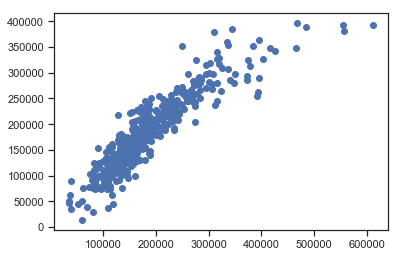

In [99]:
plt.scatter(Y_test,y_pred)